In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("eeg_train.csv")

In [4]:
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0,353733,0,0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6,353733,1,6,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8,353733,2,8,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18,353733,3,18,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24,353733,4,24,3080632009,42516,Seizure,3,0,0,0,0,0


In [5]:
df.tail()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
106795,351917269,6,12,2147388374,6,12,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14,2147388374,7,14,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16,2147388374,8,16,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18,2147388374,9,18,3786213131,10351,LRDA,0,0,0,3,0,0
106799,351917269,10,20,2147388374,10,20,3642716176,10351,LRDA,0,0,0,3,0,0


In [6]:
df.shape

(106800, 15)

In [7]:
df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'],
      dtype='object')

1. **`eeg_id`**: Unique identifier for the entire EEG recording. It represents a specific EEG session or recording from a patient.

2. **`eeg_sub_id`**: An ID for the specific 50-second long subsample to which the row's labels apply. This column helps identify a particular subset or segment within the larger EEG recording.

3. **`eeg_label_offset_seconds`**: The time between the beginning of the consolidated EEG and the subsample. It indicates the time offset for the EEG subsample within the entire EEG recording.

4. **`spectrogram_id`**: Unique identifier for the entire EEG recording, similar to `eeg_id`. It is related to the spectrogram data.

5. **`spectrogram_sub_id`**: An ID for the specific 10-minute subsample to which the row's labels apply. This corresponds to a subset within the larger spectrogram data.

6. **`spectrogram_label_offset_seconds`**: The time between the beginning of the consolidated spectrogram and the subsample. It indicates the time offset for the spectrogram subsample within the entire spectrogram recording.

7. **`label_id`**: An ID for this set of labels. It helps distinguish different sets of labels within the dataset.

8. **`patient_id`**: An ID for the patient who donated the data. It uniquely identifies each patient.

9. **`expert_consensus`**: The consensus annotator label for convenience. This column may provide a summary or agreement among expert annotators regarding the type of brain activity in the given subsample.

10. **`seizure_vote`**, **`lpd_vote`**, **`gpd_vote`**, **`lrda_vote`**, **`grda_vote`**, **`other_vote`**: These columns represent the count of annotator votes for specific brain activity classes. The classes are:
    - `seizure_vote`: Count of votes for seizure.
    - `lpd_vote`: Count of votes for lateralized periodic discharges.
    - `gpd_vote`: Count of votes for generalized periodic discharges.
    - `lrda_vote`: Count of votes for lateralized rhythmic delta activity.
    - `grda_vote`: Count of votes for generalized rhythmic delta activity.
    - `other_vote`: Count of votes for other types of brain activity.

11. **Target Variable**: The target variable in this dataset is the actual brain activity class for each subsample. It could be any of the following:
    - Seizure (`seizure_vote`): Represents the count of votes for seizure.
    - Lateralized Periodic Discharges (`lpd_vote`): Represents the count of votes for lateralized periodic discharges.
    - Generalized Periodic Discharges (`gpd_vote`): Represents the count of votes for generalized periodic discharges.
    - Lateralized Rhythmic Delta Activity (`lrda_vote`): Represents the count of votes for lateralized rhythmic delta activity.
    - Generalized Rhythmic Delta Activity (`grda_vote`): Represents the count of votes for generalized rhythmic delta activity.
    - Other (`other_vote`): Represents the count of votes for other types of brain activity.

The target variable is the type of brain activity class (seizure, lpd, gpd, lrda, grda, other), and the goal of the competition or analysis is likely to predict or classify the correct brain activity class for each EEG subsample.

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   eeg_id                            106800 non-null  int64 
 1   eeg_sub_id                        106800 non-null  int64 
 2   eeg_label_offset_seconds          106800 non-null  int64 
 3   spectrogram_id                    106800 non-null  int64 
 4   spectrogram_sub_id                106800 non-null  int64 
 5   spectrogram_label_offset_seconds  106800 non-null  int64 
 6   label_id                          106800 non-null  int64 
 7   patient_id                        106800 non-null  int64 
 8   expert_consensus                  106800 non-null  object
 9   seizure_vote                      106800 non-null  int64 
 10  lpd_vote                          106800 non-null  int64 
 11  gpd_vote                          106800 non-null  int64 
 12  lr

In [11]:
df.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


In [12]:
df.nunique()

eeg_id                               17089
eeg_sub_id                             743
eeg_label_offset_seconds              1502
spectrogram_id                       11138
spectrogram_sub_id                    1022
spectrogram_label_offset_seconds      4686
label_id                            106800
patient_id                            1950
expert_consensus                         6
seizure_vote                            18
lpd_vote                                19
gpd_vote                                17
lrda_vote                               16
grda_vote                               16
other_vote                              26
dtype: int64

In [13]:
object_columns = df.select_dtypes(include=['object', 'bool']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['expert_consensus'], dtype='object')

Numerical type columns:
Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote',
       'grda_vote', 'other_vote'],
      dtype='object')


In [14]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype in ['object', 'bool']:
            if df[column].nunique() < 15:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [15]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [16]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['expert_consensus']
Non-Categorical Features: []
Discrete Features: []
Continuous Features: ['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id', 'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id', 'patient_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


In [17]:
for i in categorical:
    print(i, ':')
    print(df[i].unique())
    print()

expert_consensus :
['Seizure' 'GPD' 'LRDA' 'Other' 'GRDA' 'LPD']



In [18]:
for i in categorical:
    print(i, ':')
    print(df[i].value_counts())
    print()

expert_consensus :
Seizure    20933
GRDA       18861
Other      18808
GPD        16702
LRDA       16640
LPD        14856
Name: expert_consensus, dtype: int64



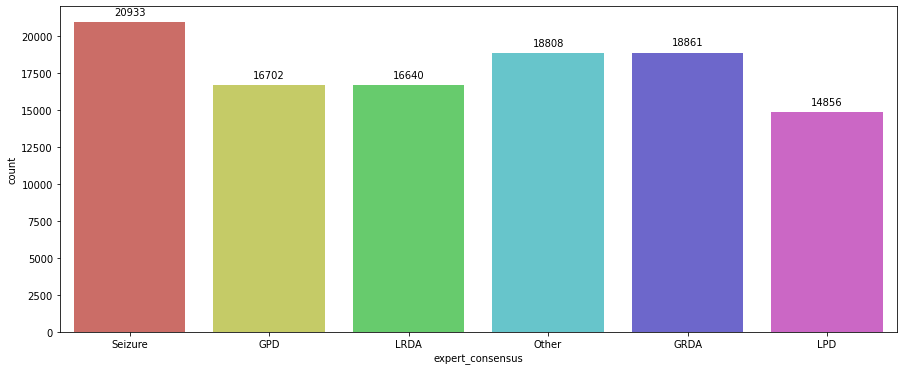

In [19]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

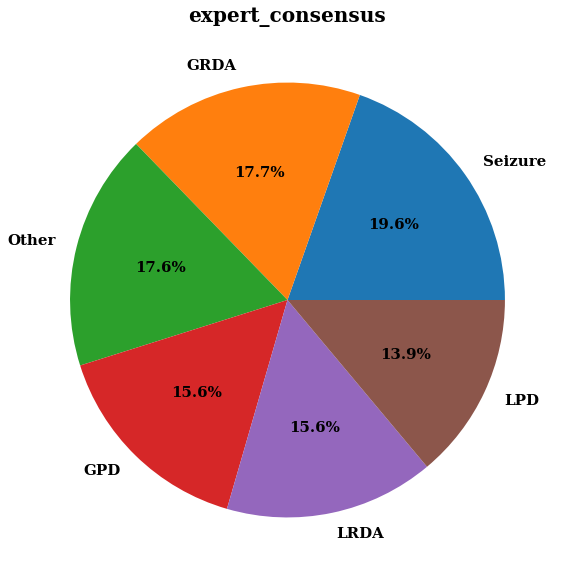

In [20]:
for i in categorical:
    plt.figure(figsize=(20,10)) 
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont) 
    plt.show()

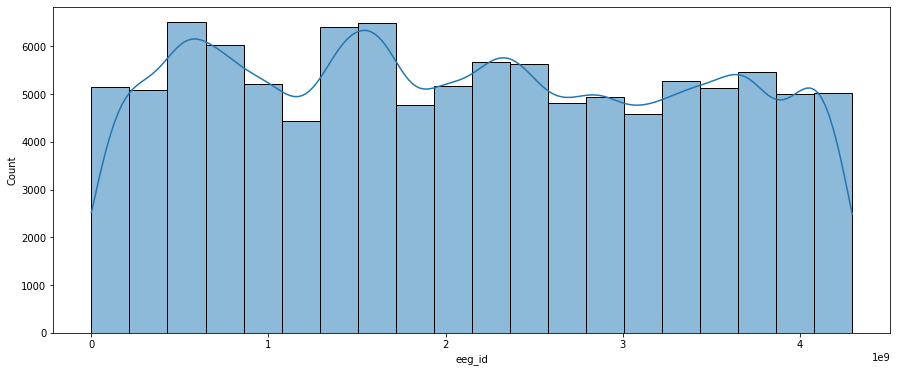

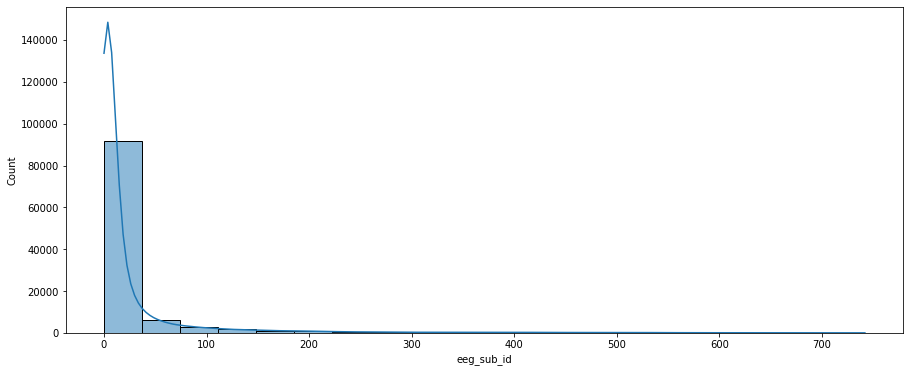

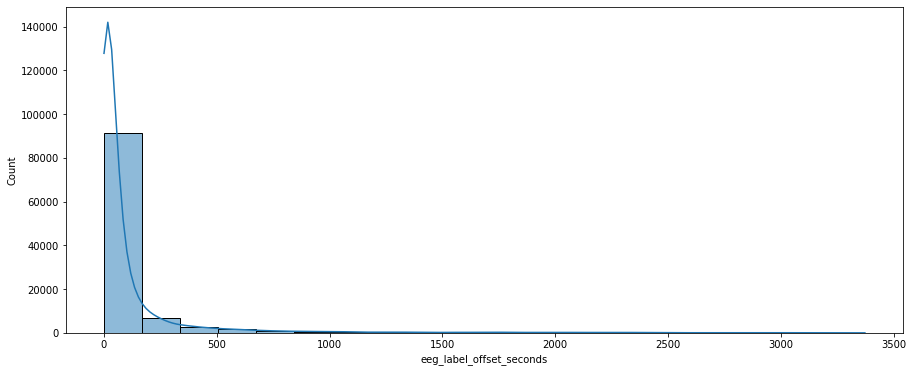

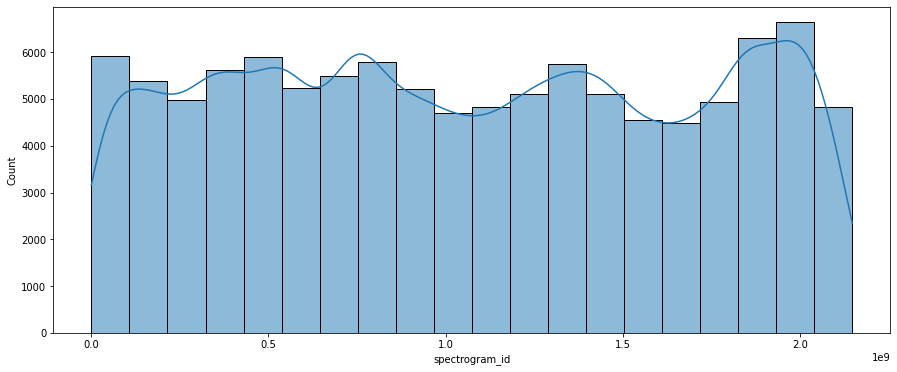

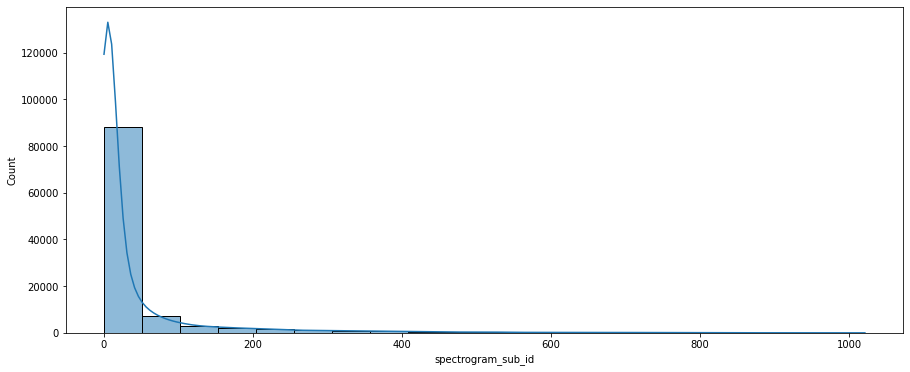

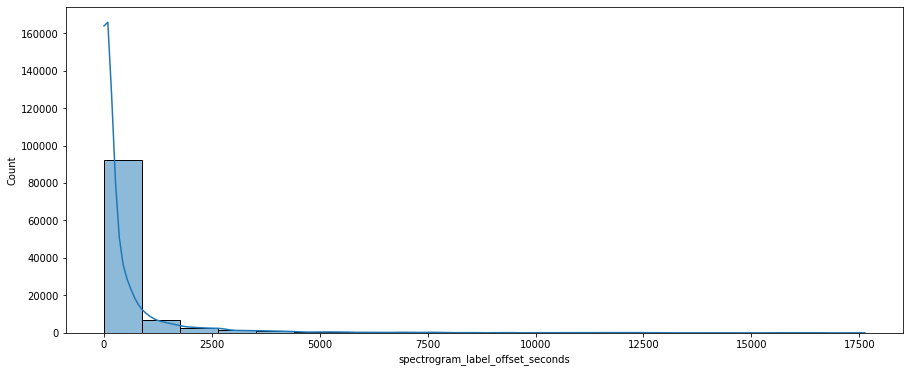

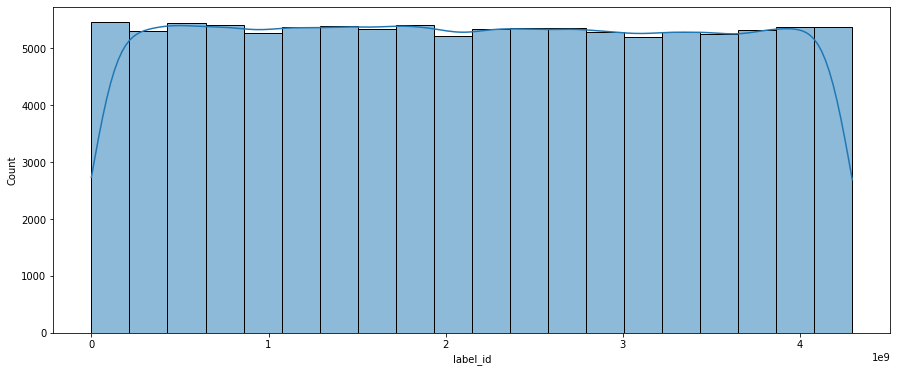

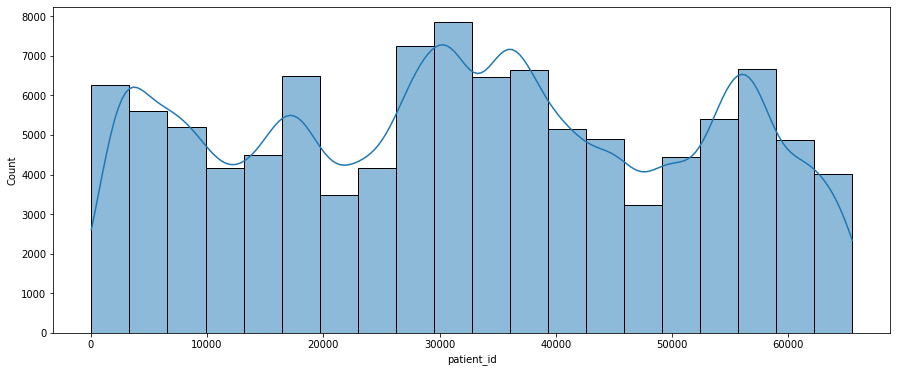

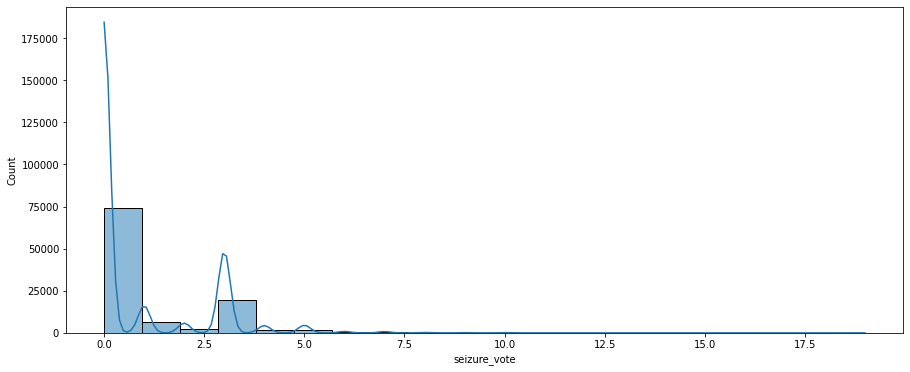

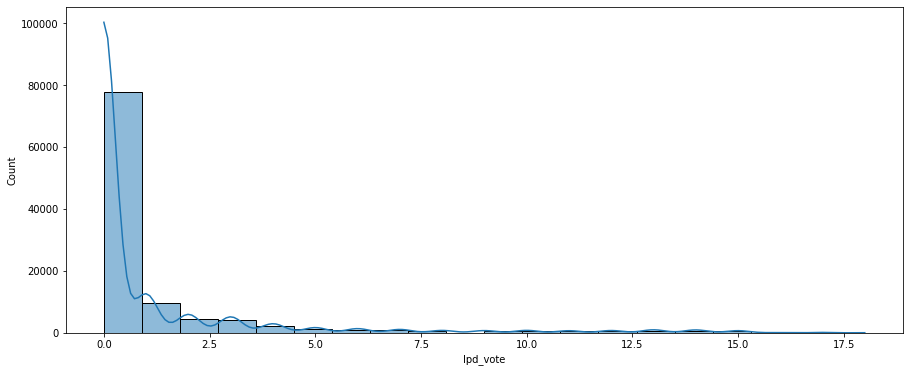

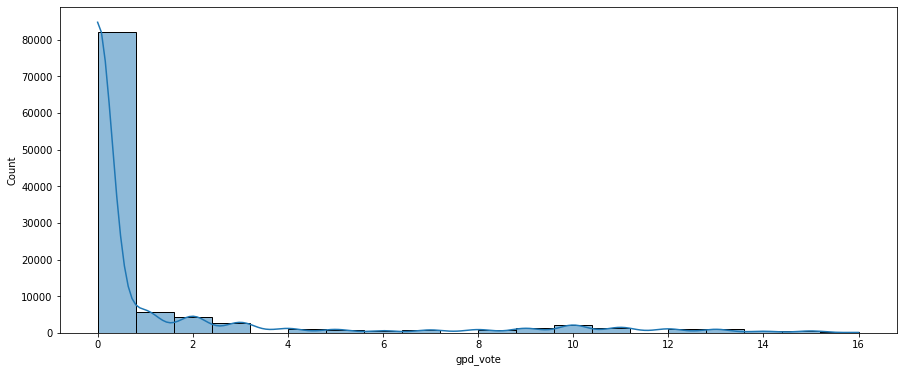

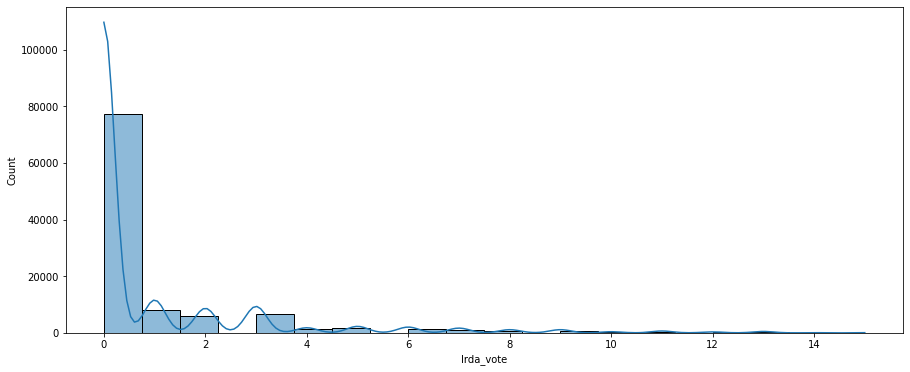

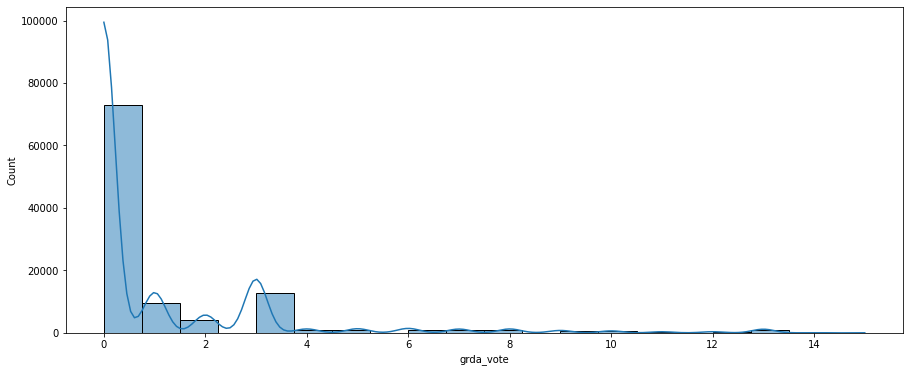

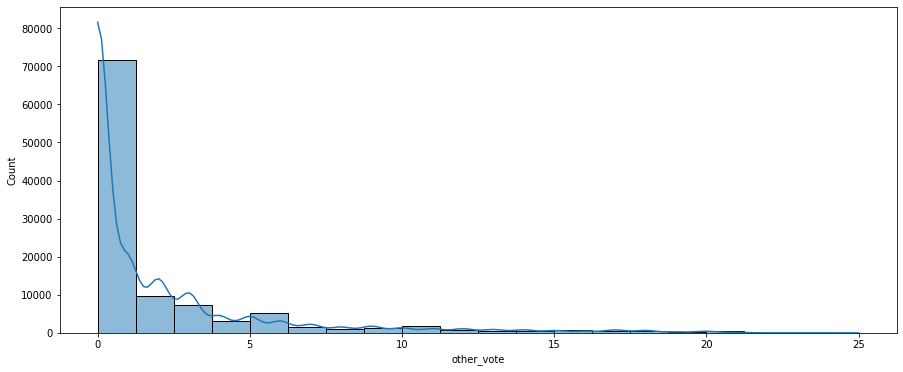

In [21]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.show()

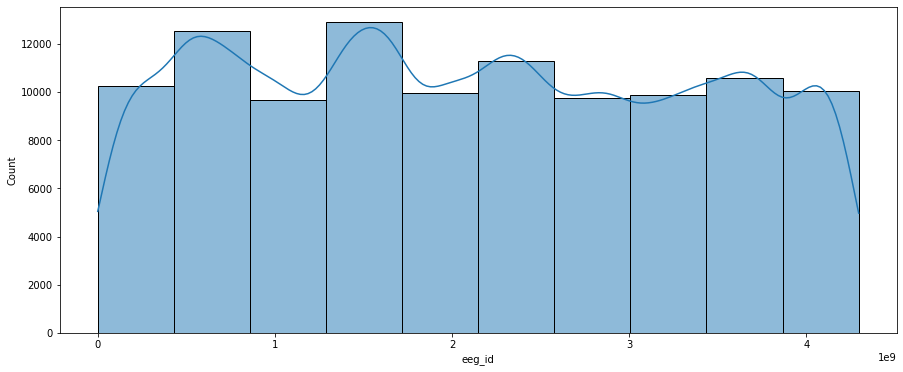

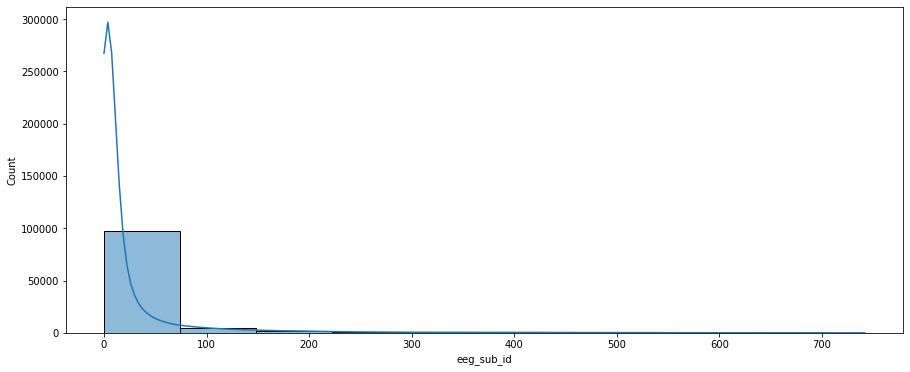

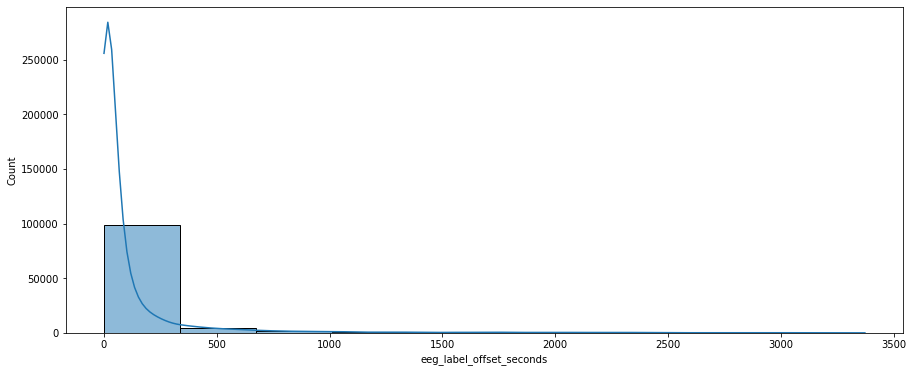

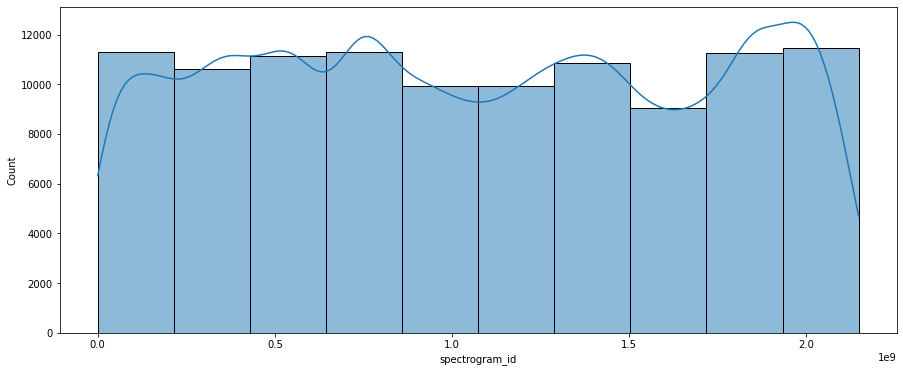

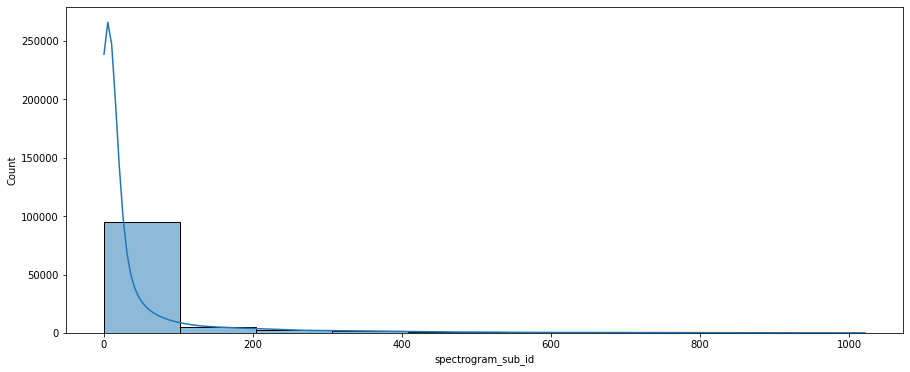

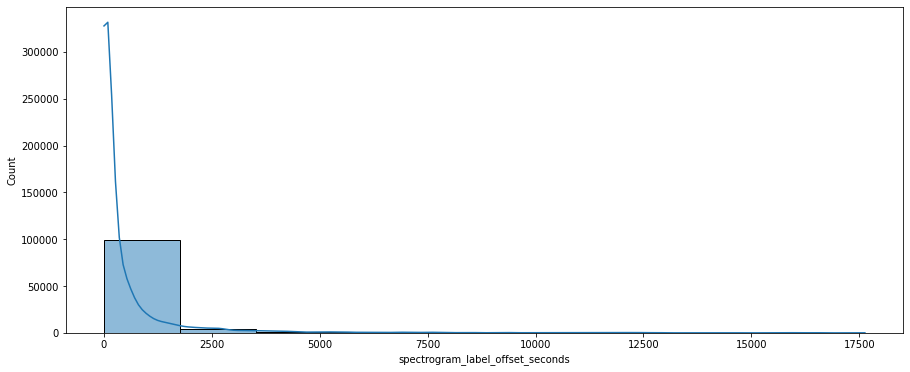

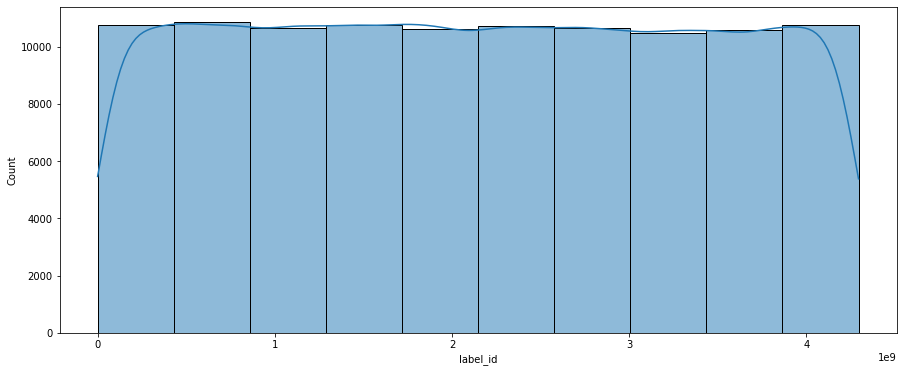

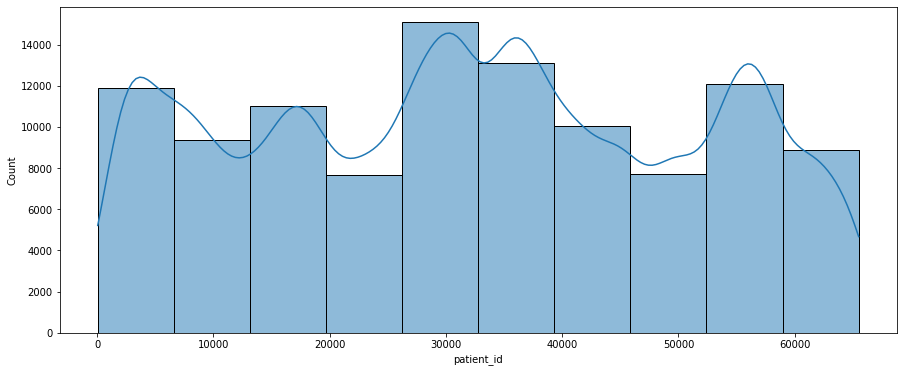

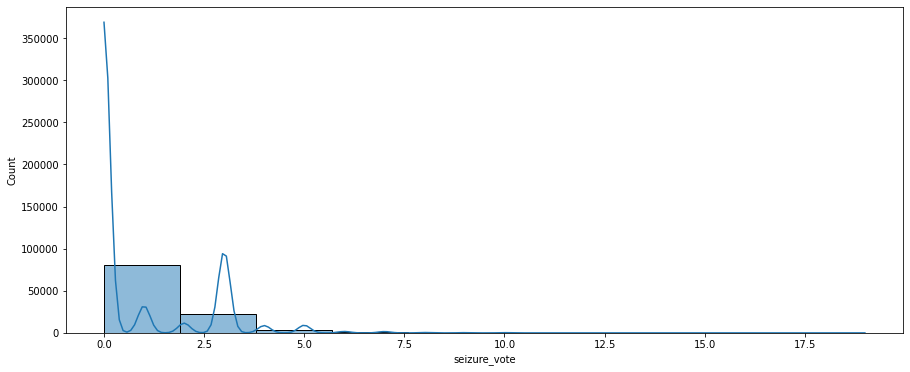

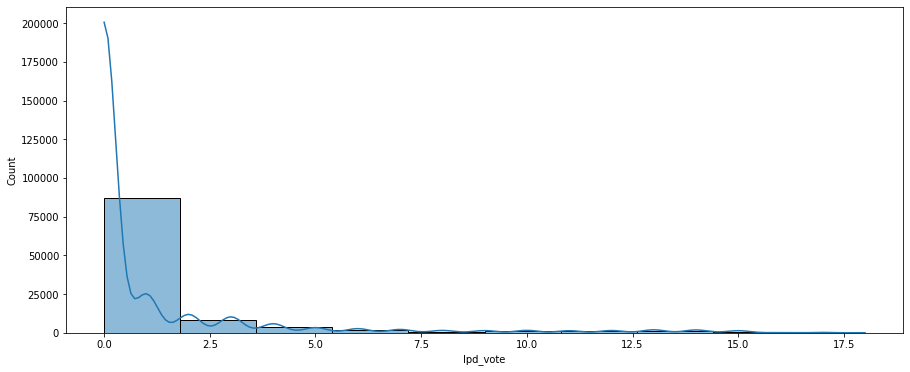

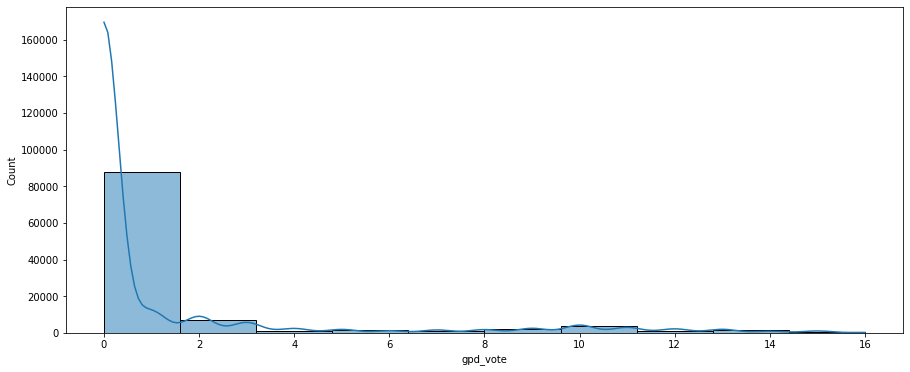

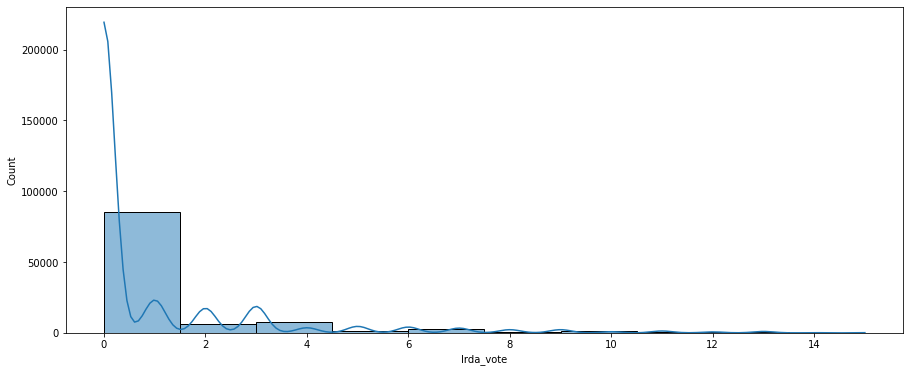

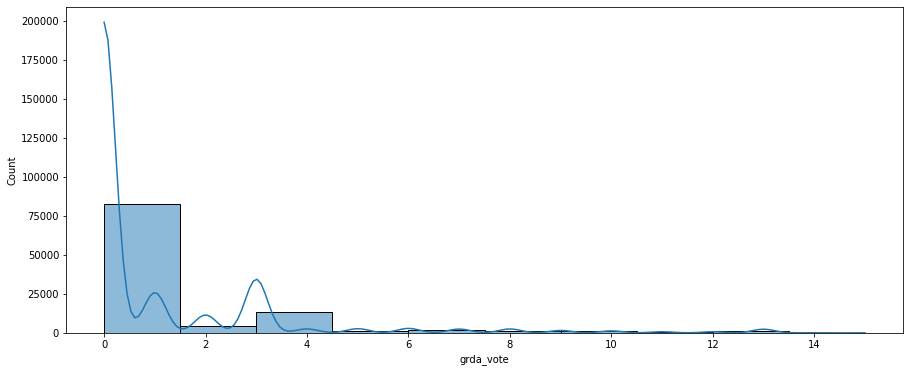

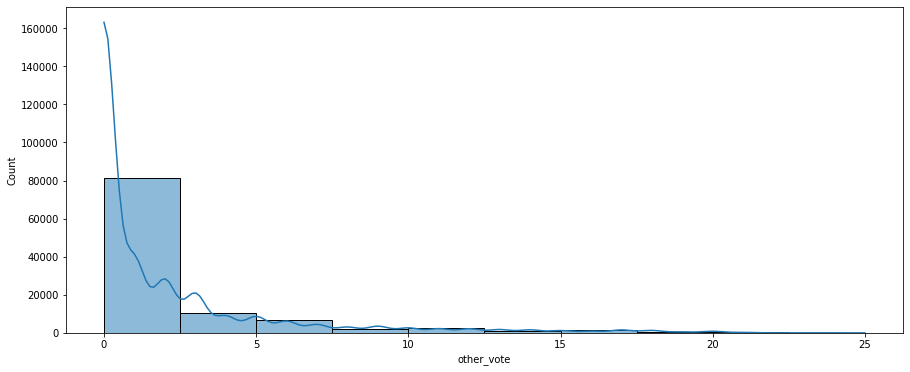

In [57]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 10, kde = True, palette='hls')
    plt.show()

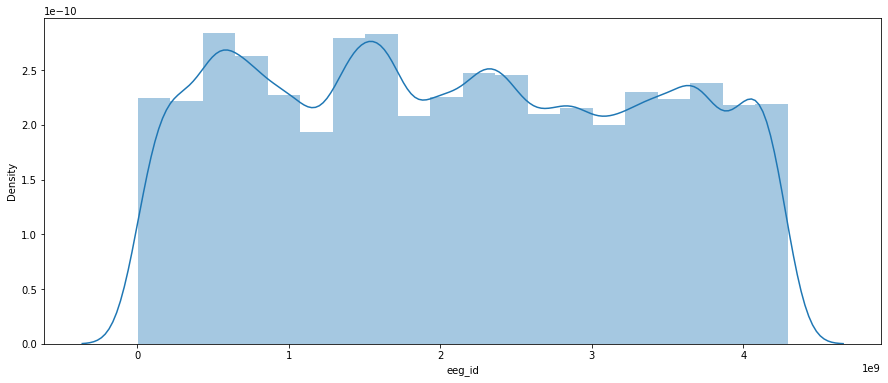

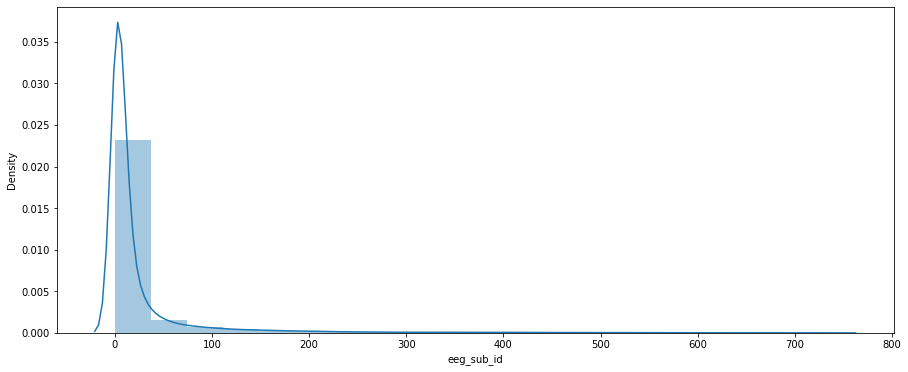

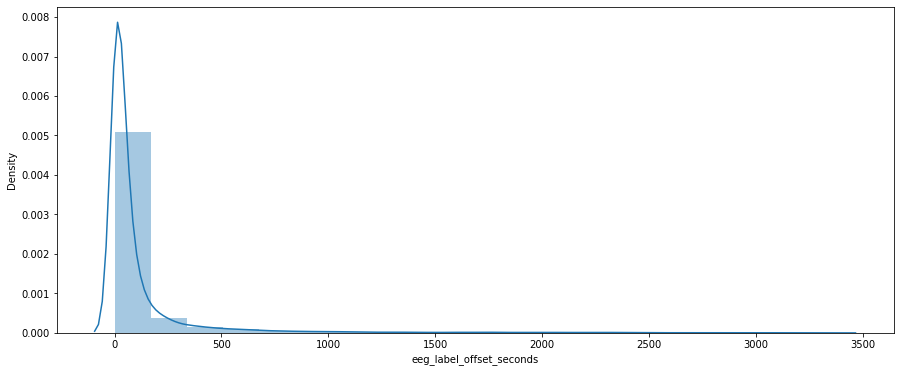

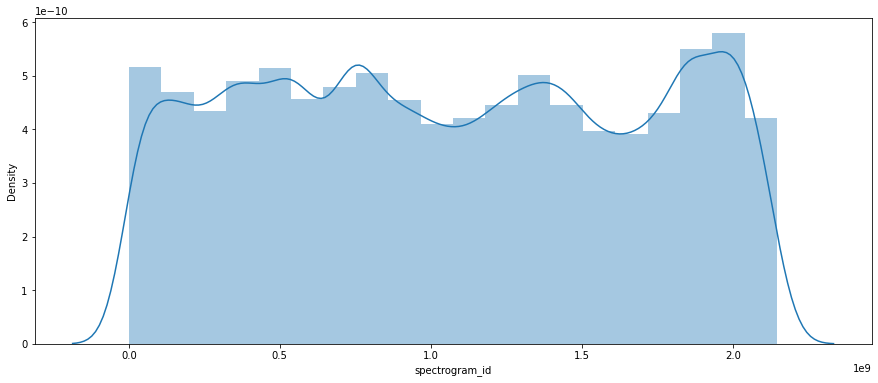

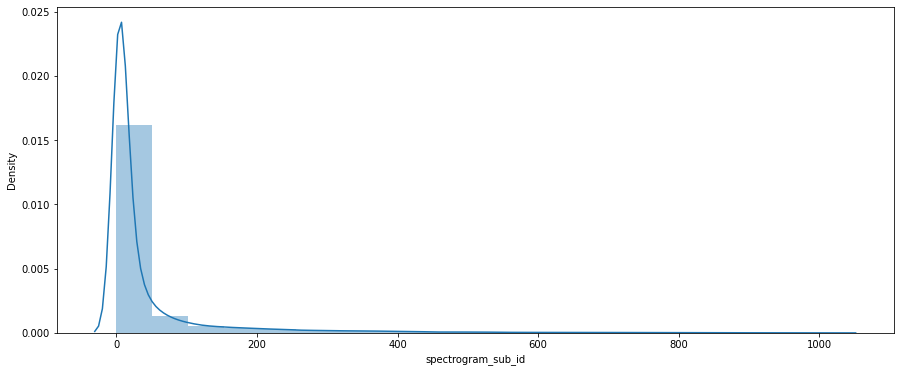

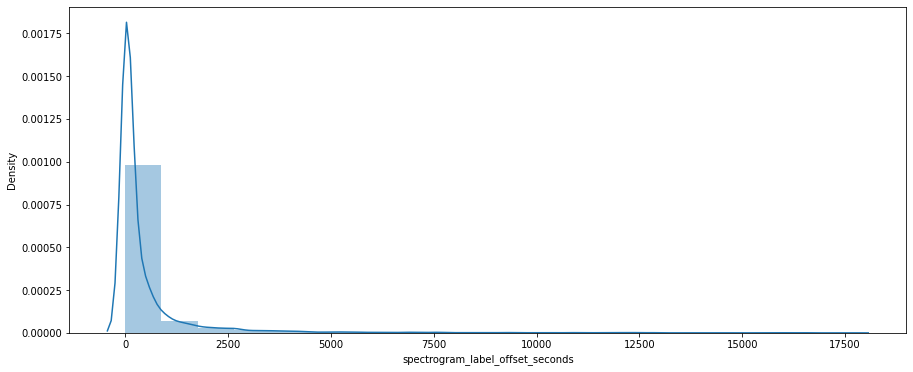

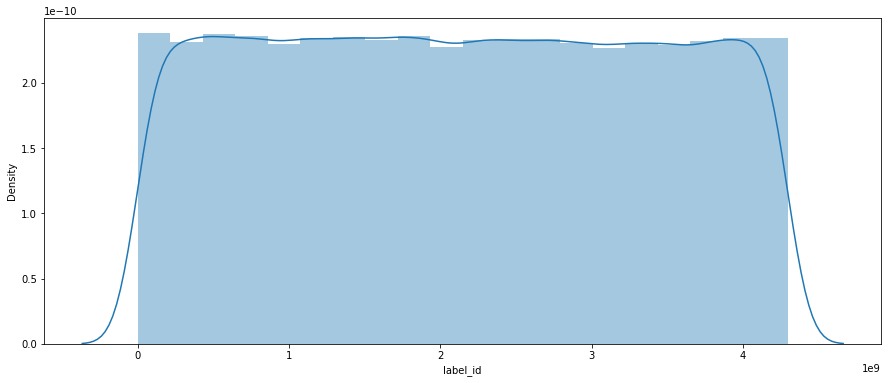

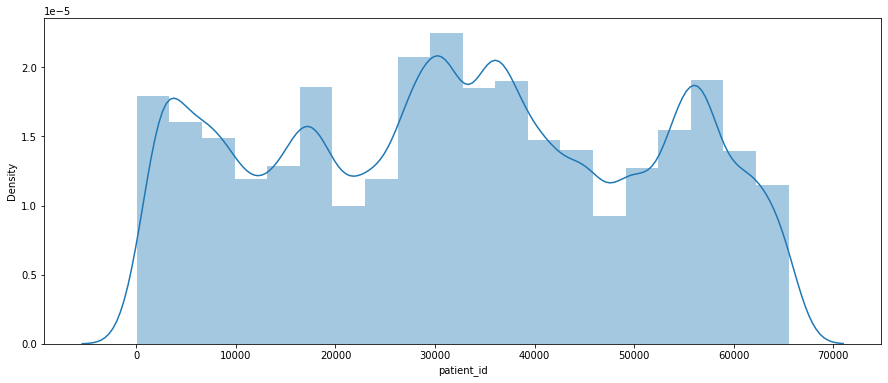

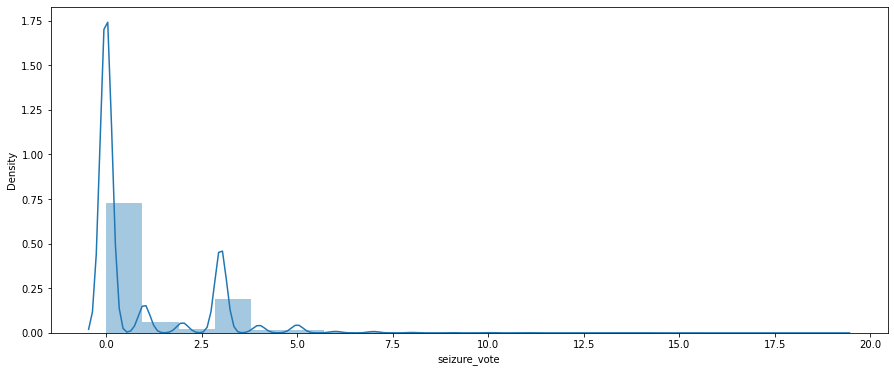

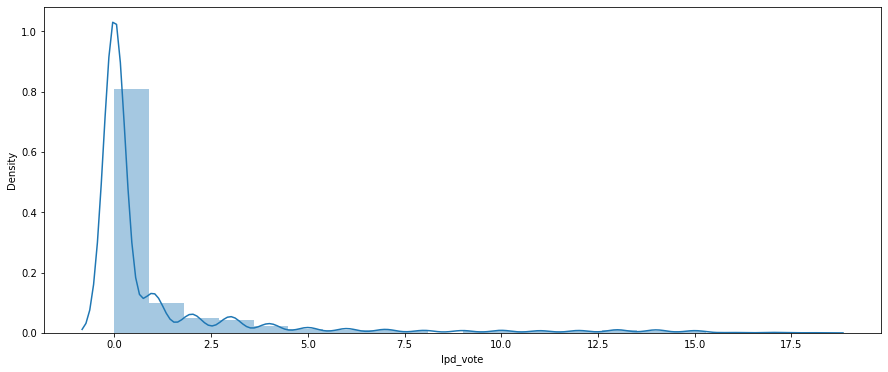

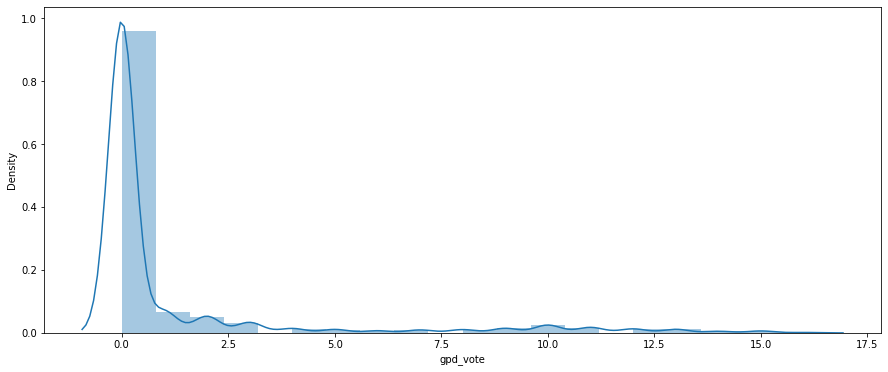

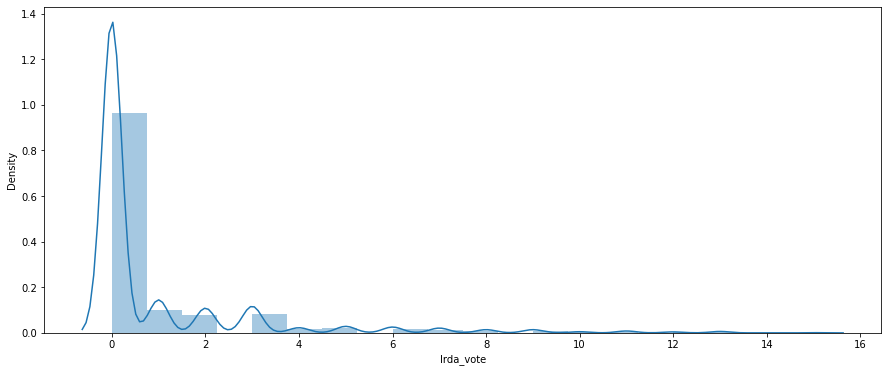

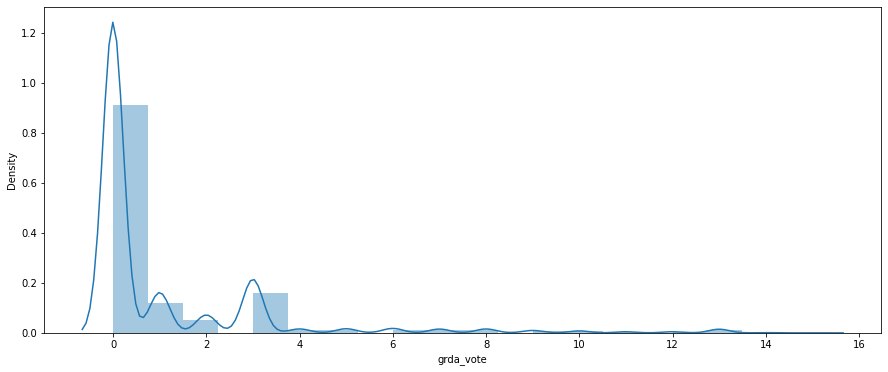

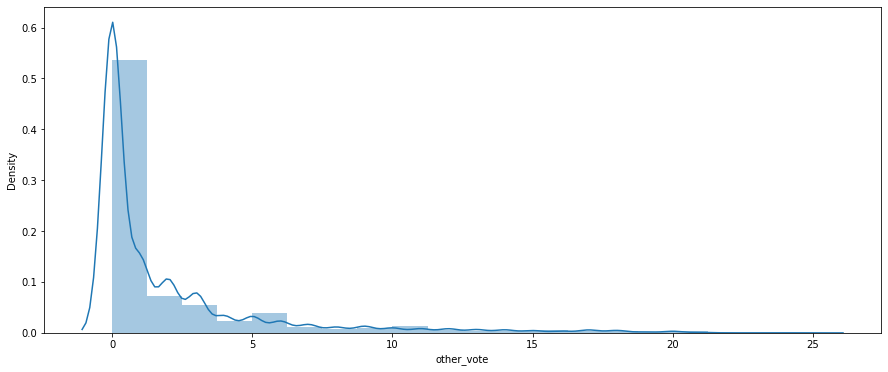

In [22]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.show()

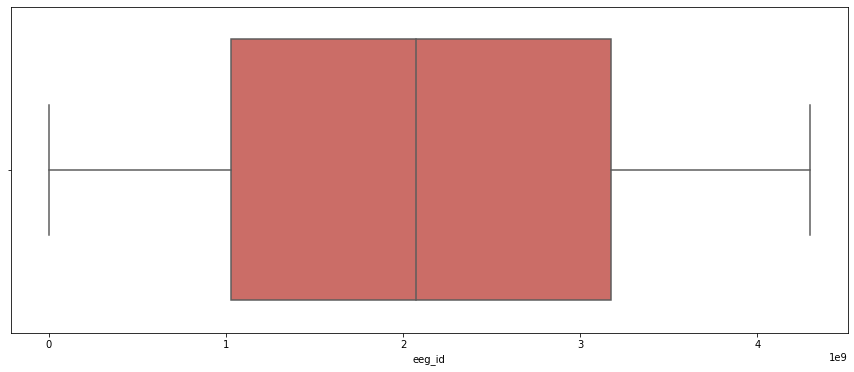

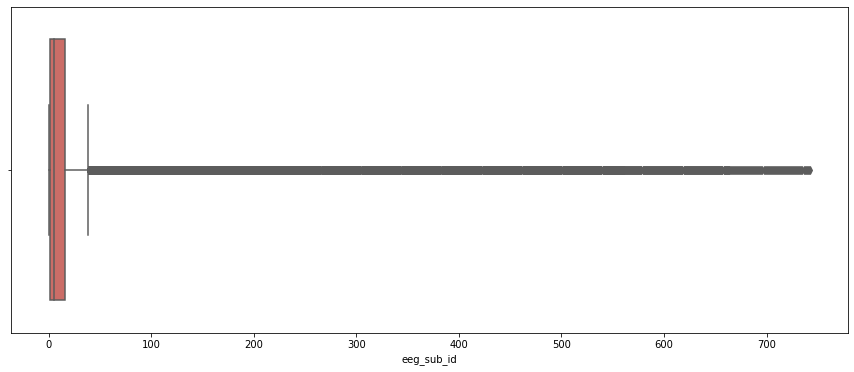

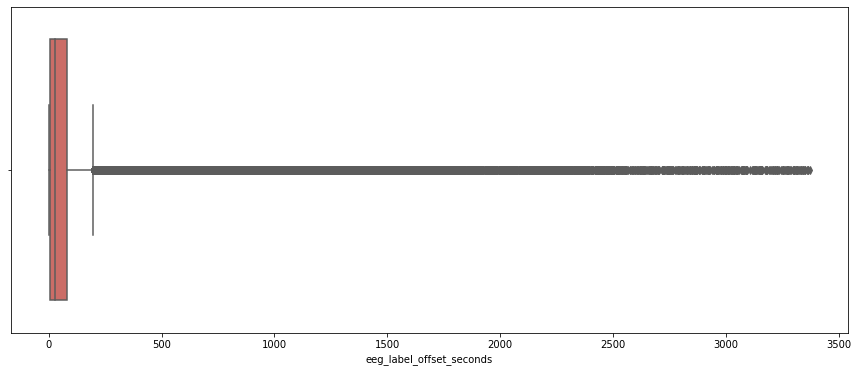

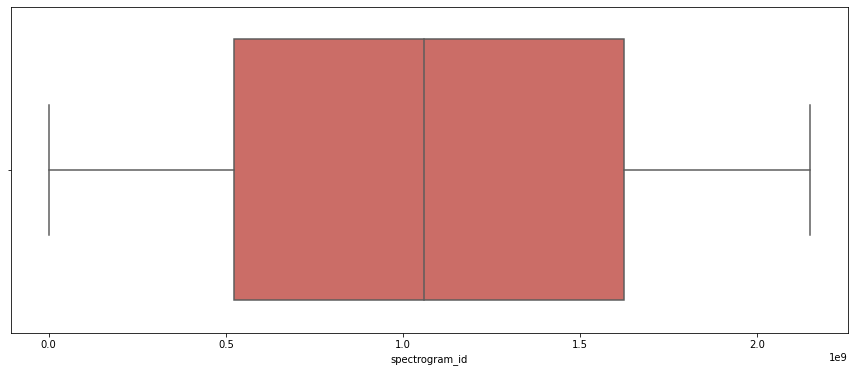

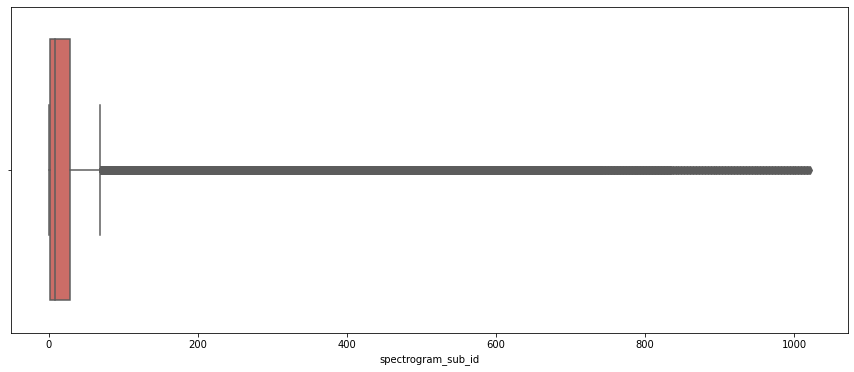

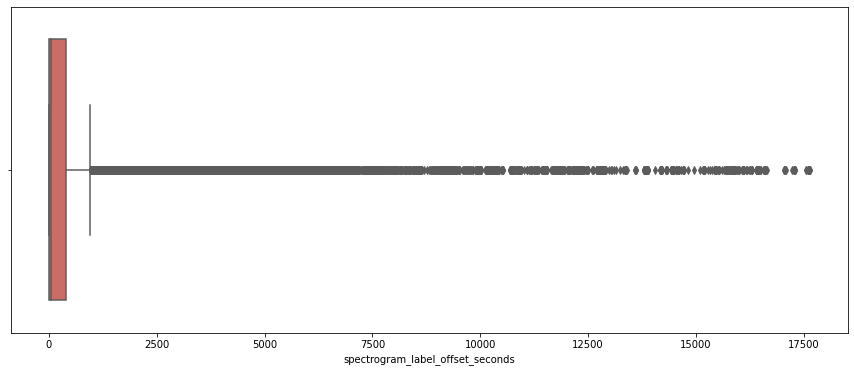

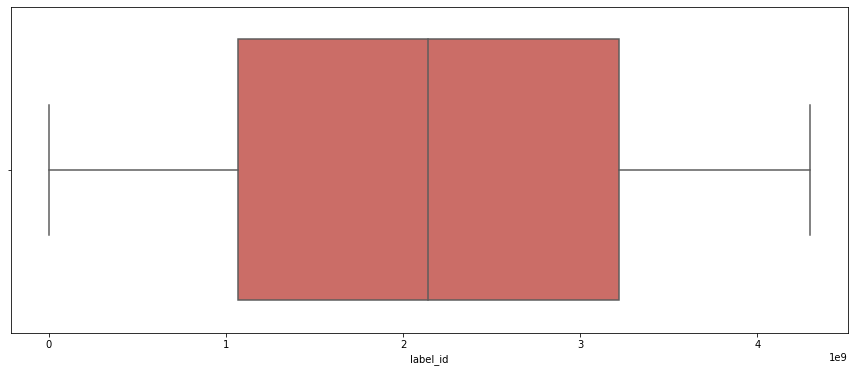

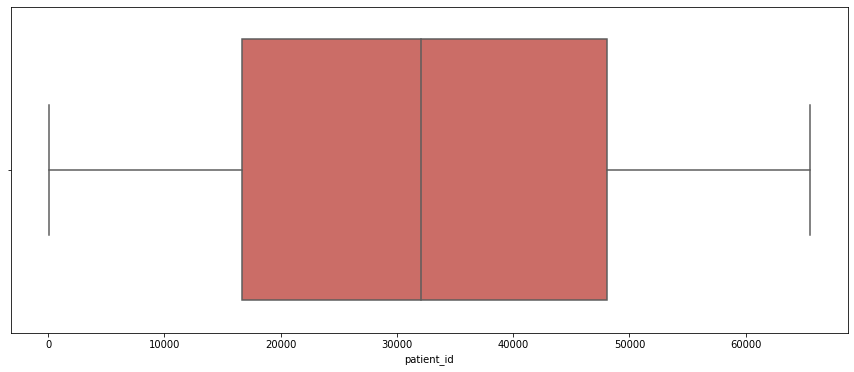

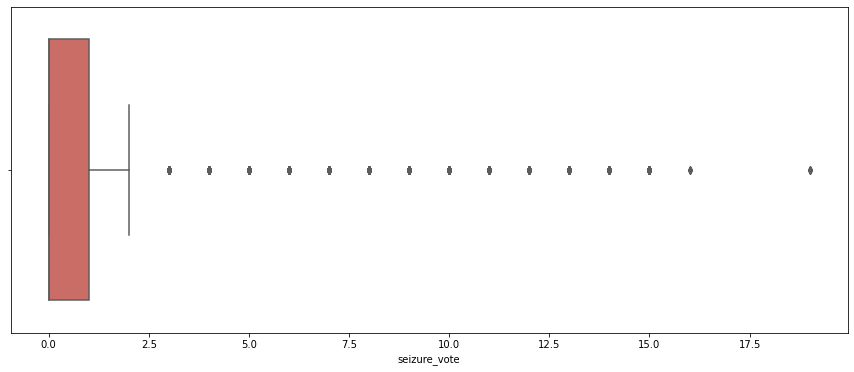

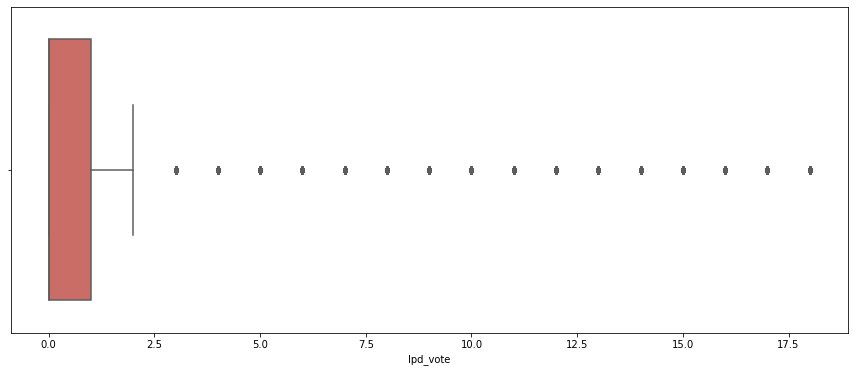

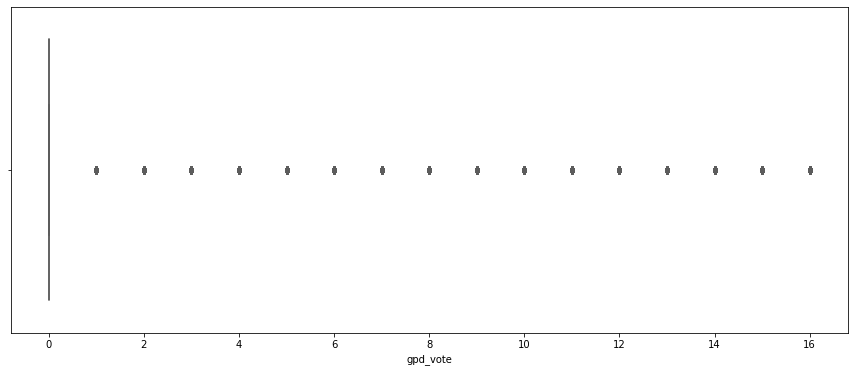

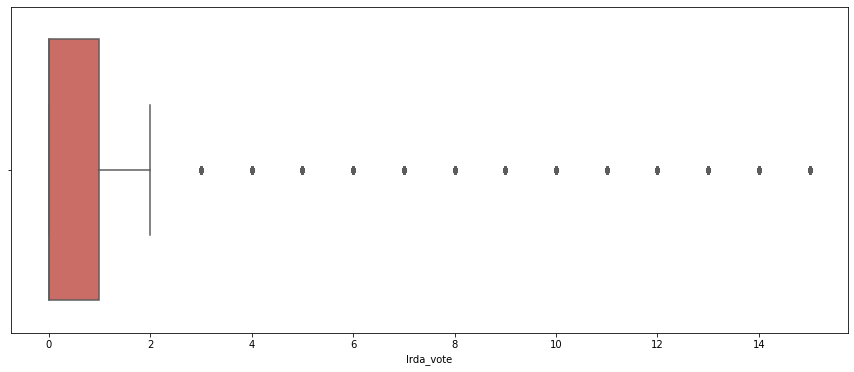

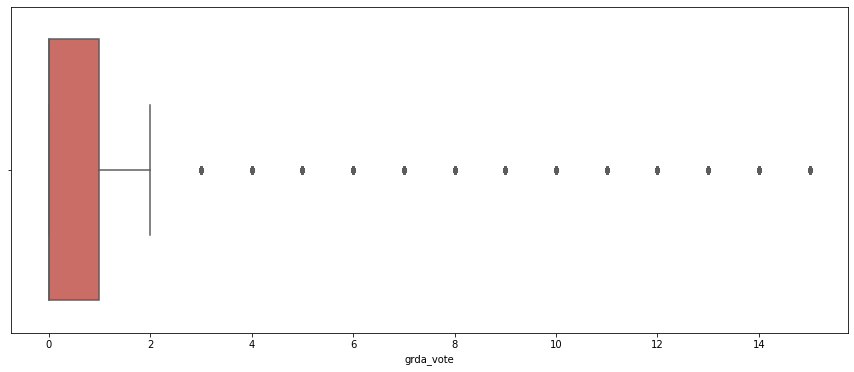

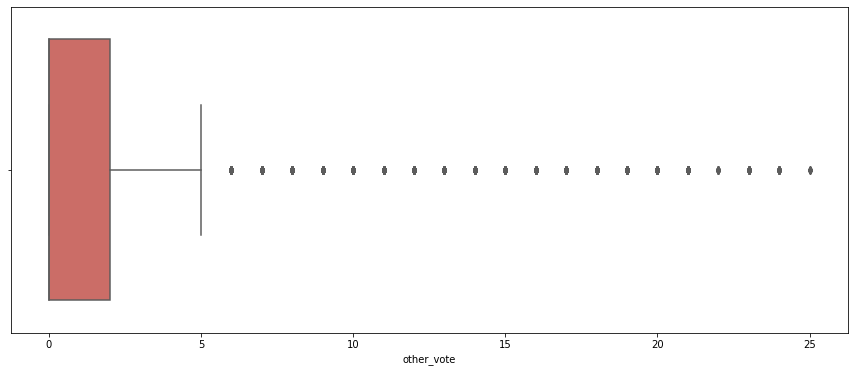

In [23]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.boxplot(i, data = df, palette='hls')
    plt.show()

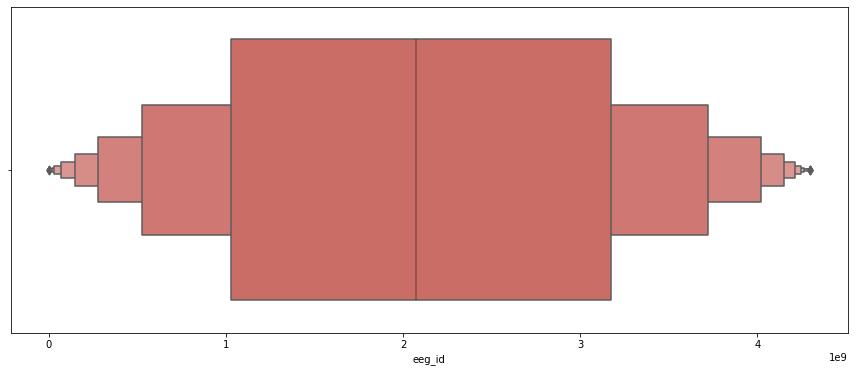

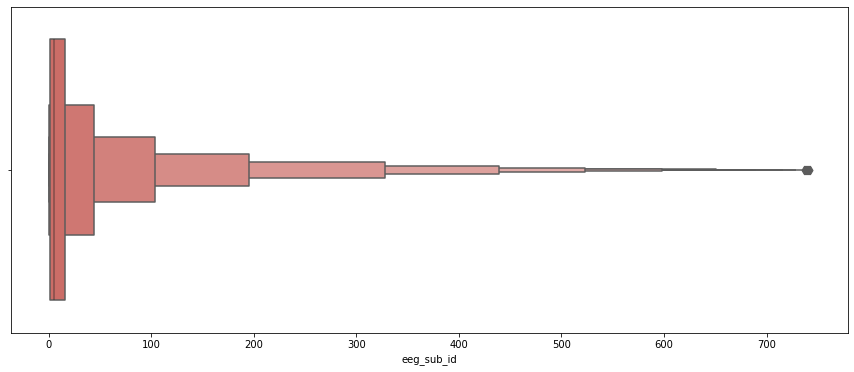

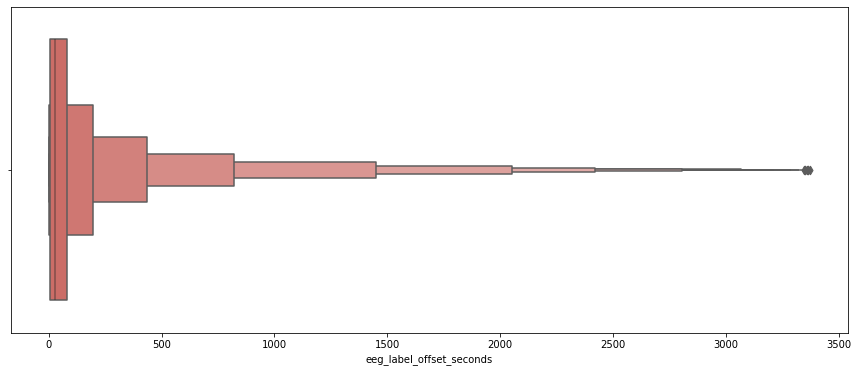

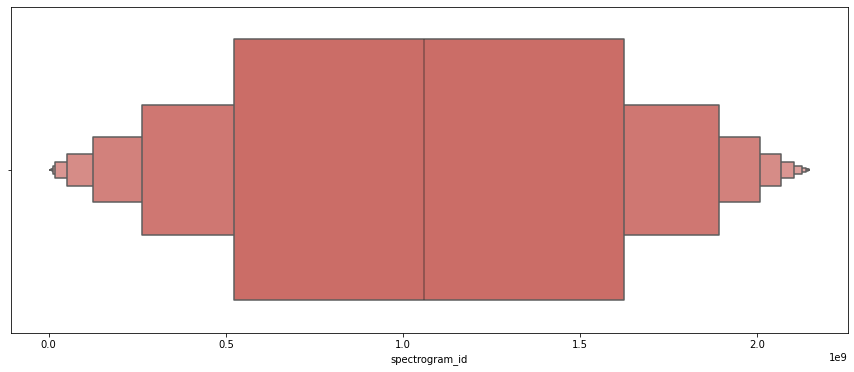

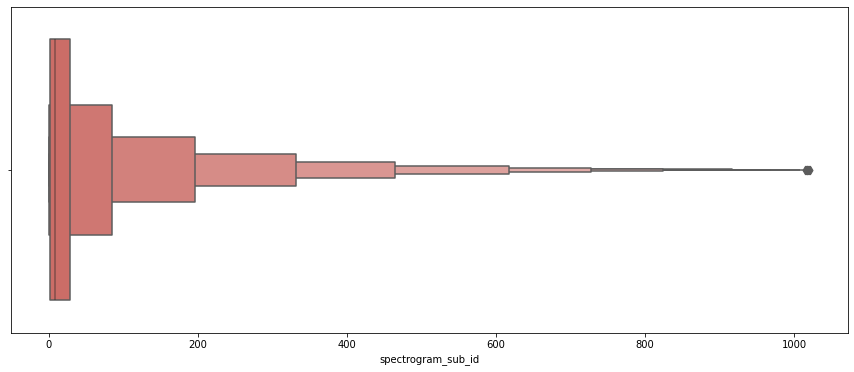

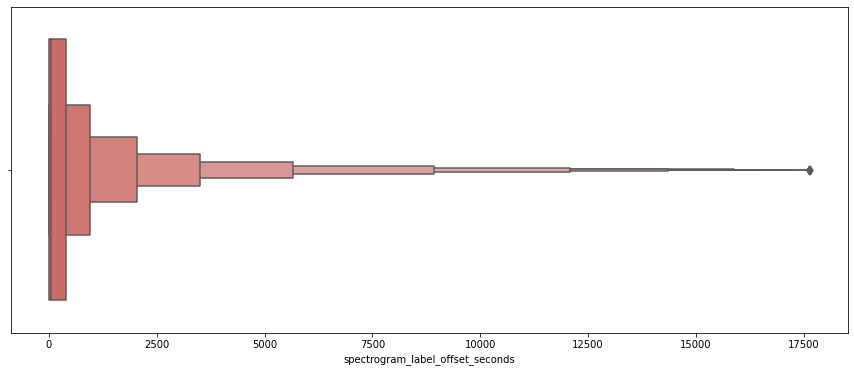

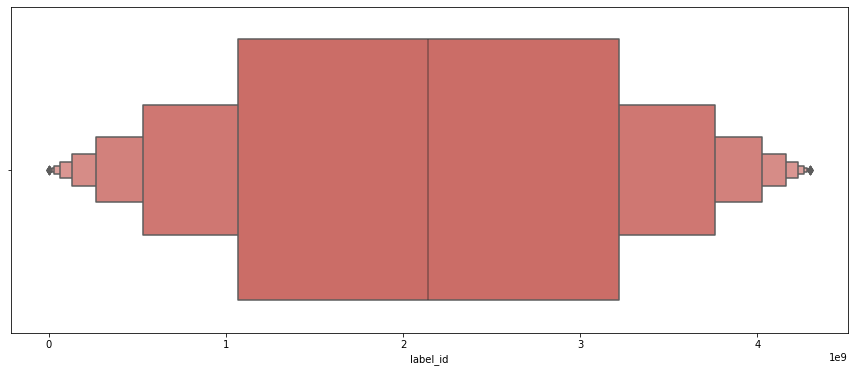

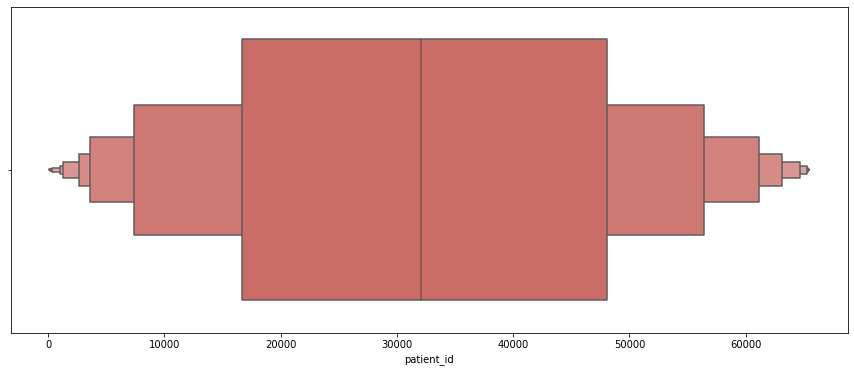

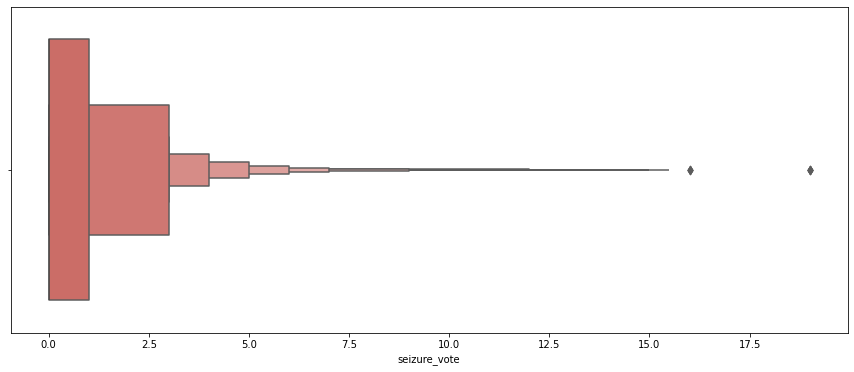

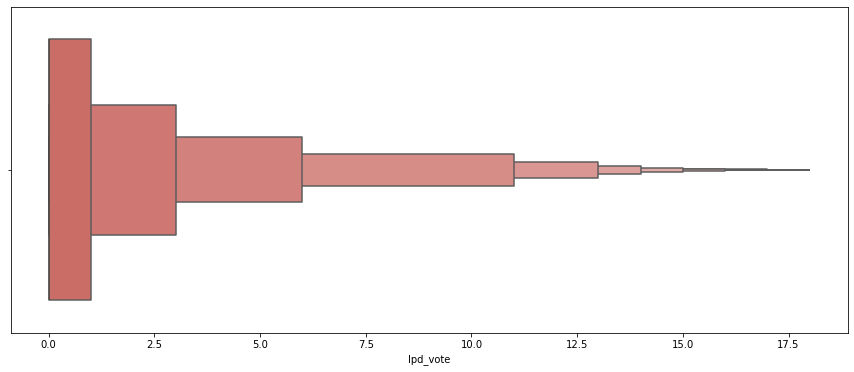

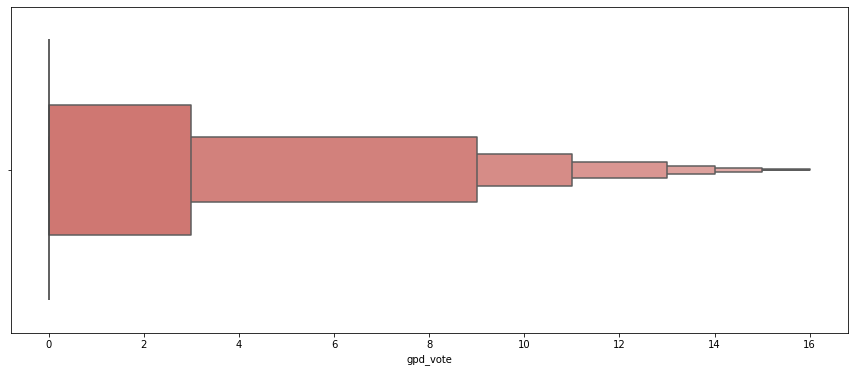

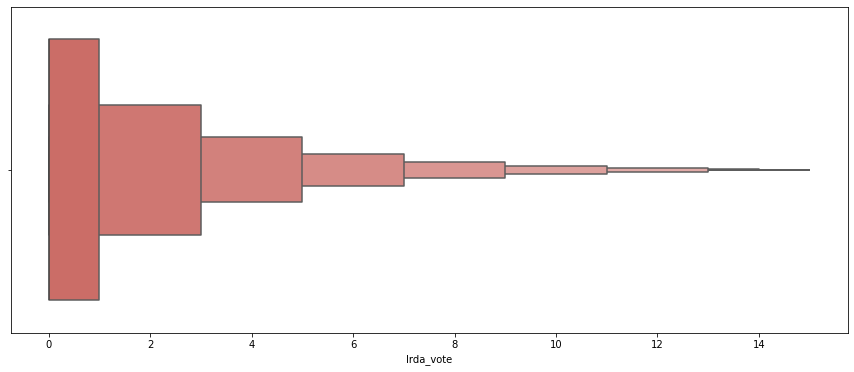

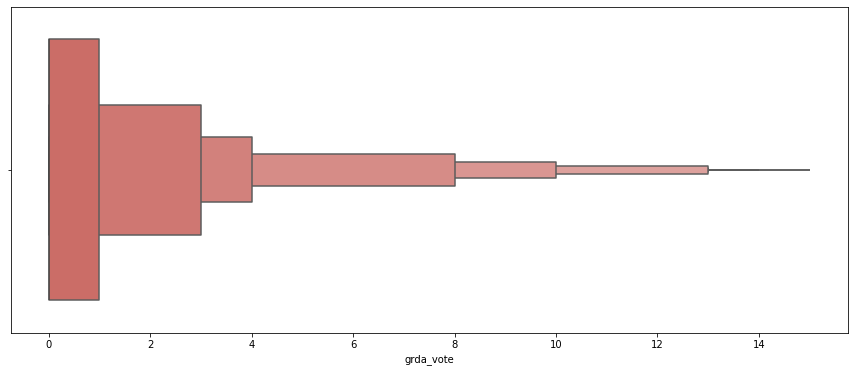

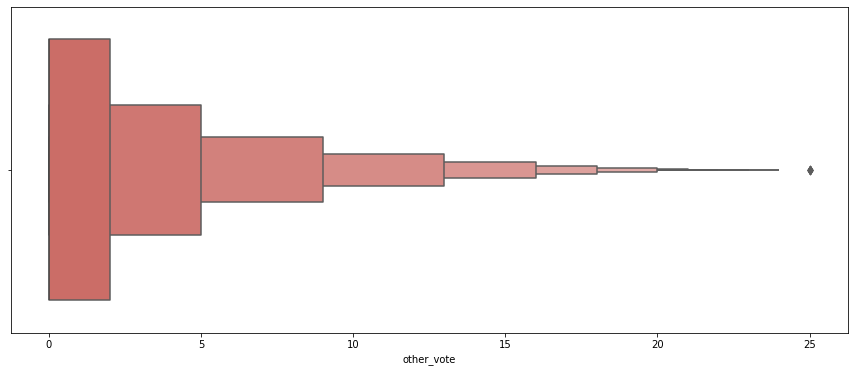

In [24]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.boxenplot(i, data = df, palette='hls')
    plt.show()

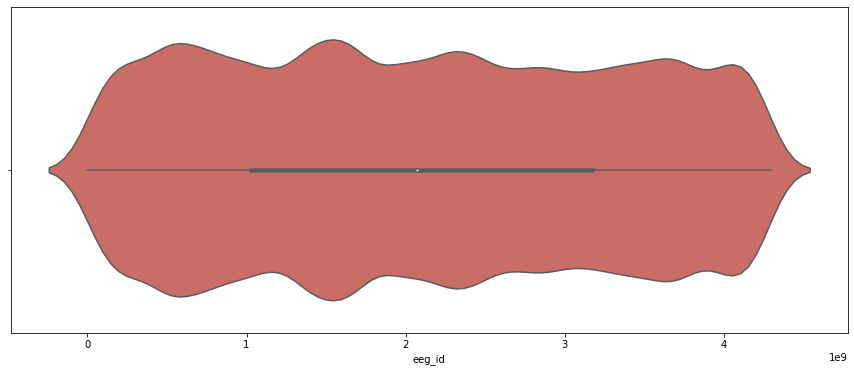

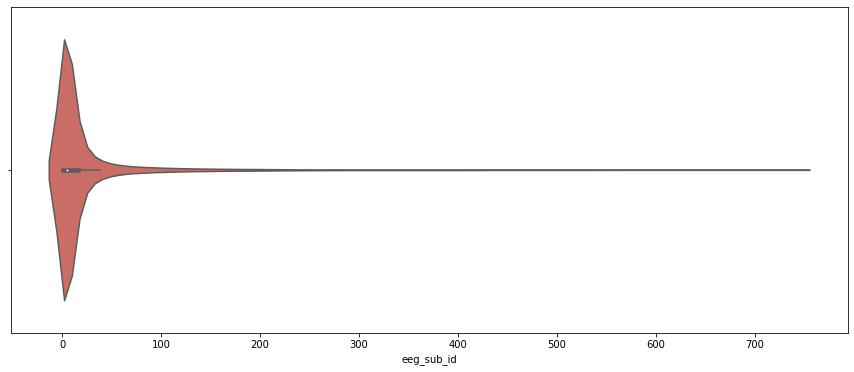

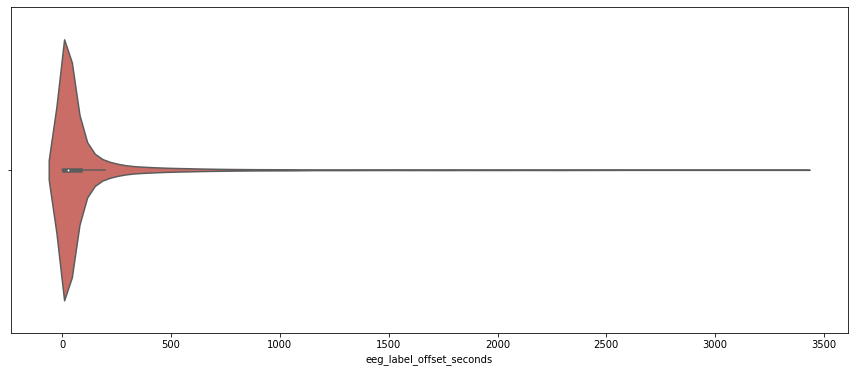

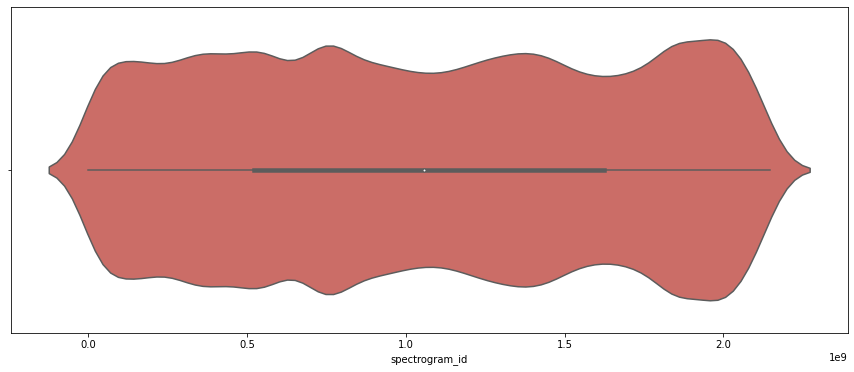

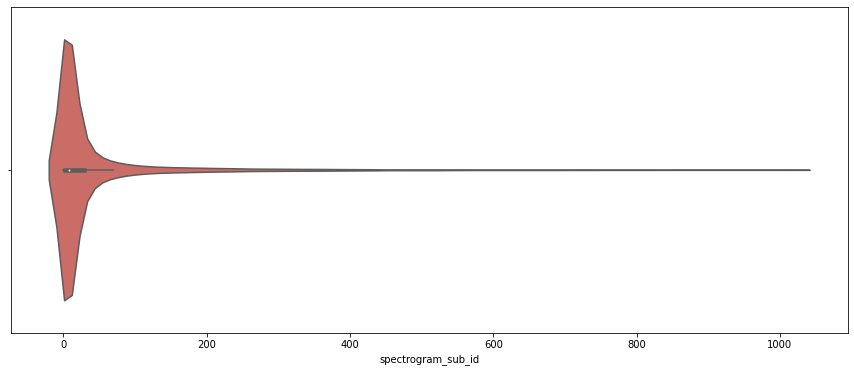

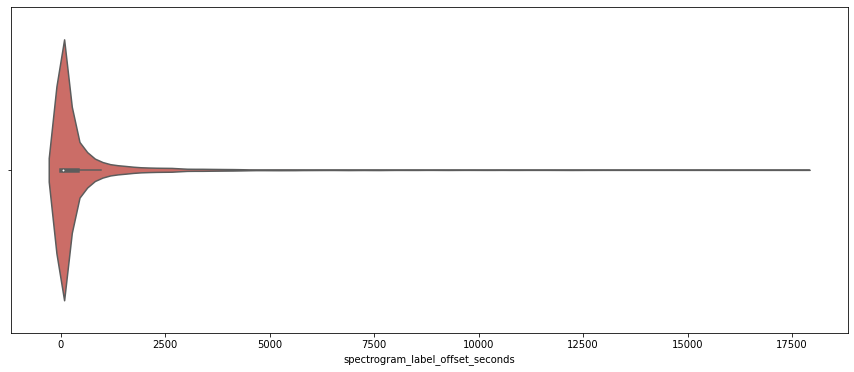

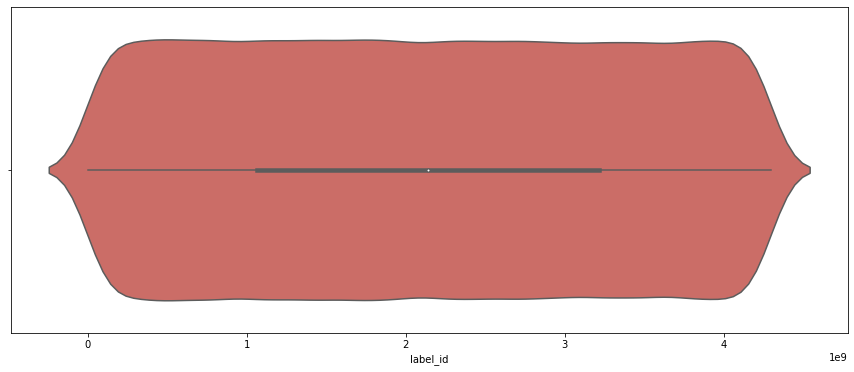

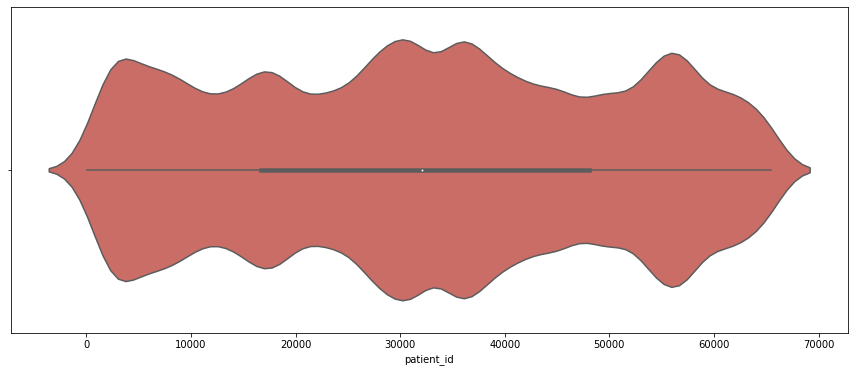

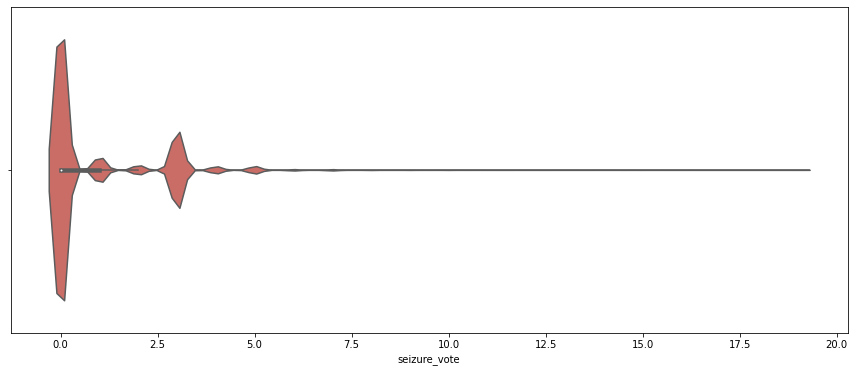

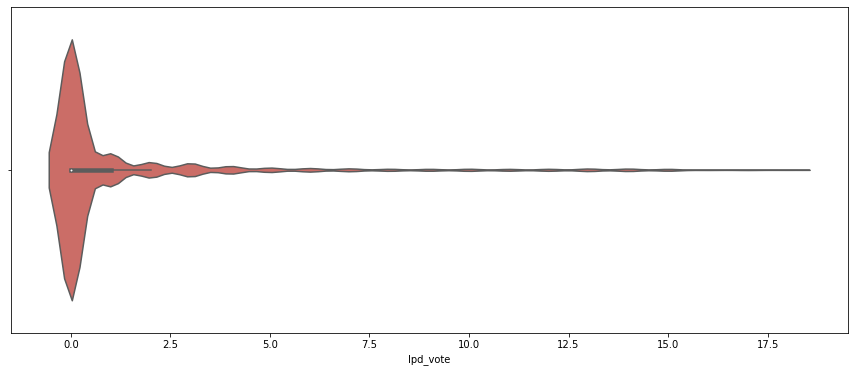

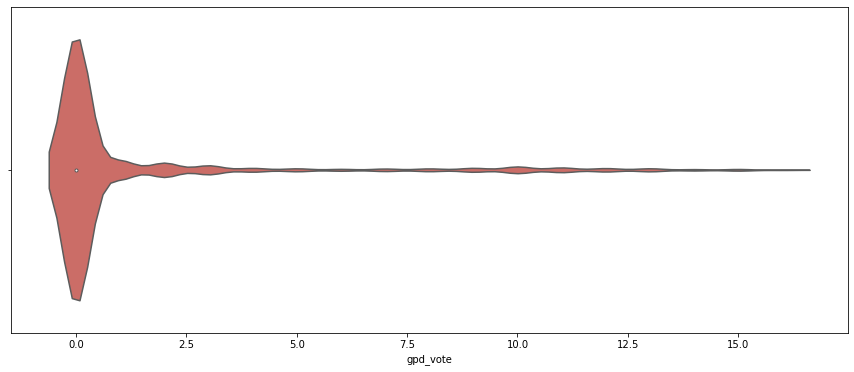

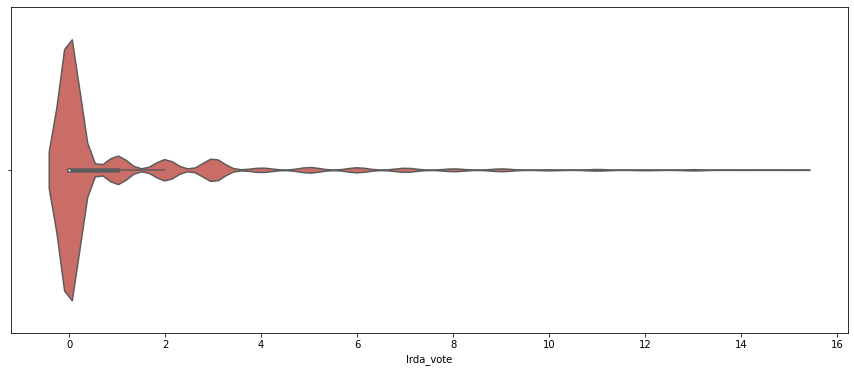

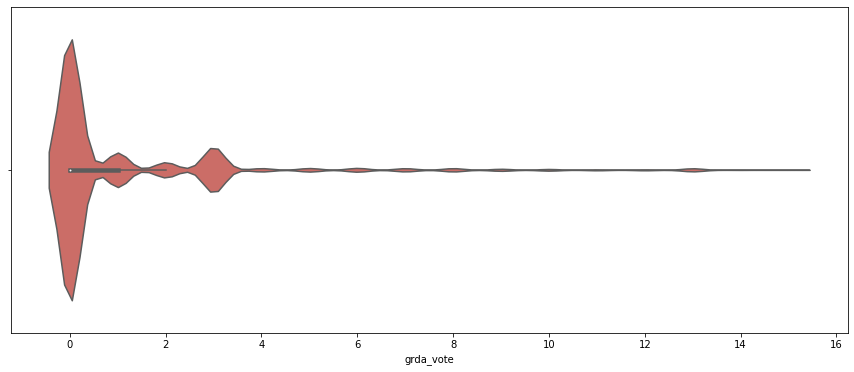

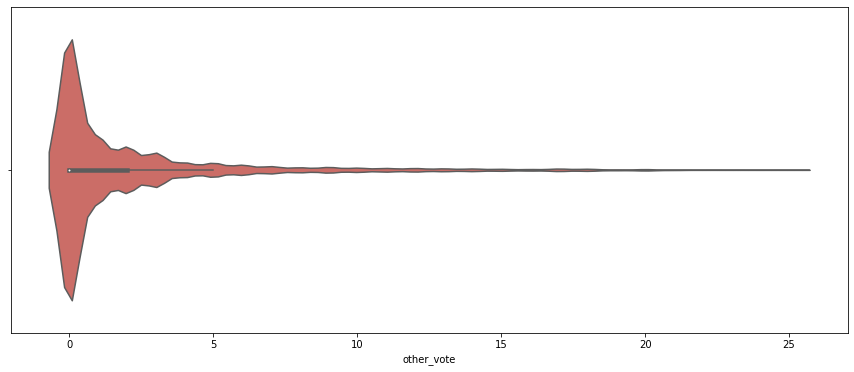

In [25]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.violinplot(i, data = df, palette='hls')
    plt.show()

In [28]:
votes_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
df_votes = df[votes_columns].melt(var_name='Brain Activity', value_name='Votes')

1. **`votes_columns`**: This is a list containing the names of columns in your original DataFrame (`df`) that represent the counts of votes for different brain activity classes. Each element in the list corresponds to a specific brain activity class.

2. **`df_votes`**: This line creates a new DataFrame (`df_votes`) by selecting only the columns specified in `votes_columns` from the original DataFrame (`df`). The selected columns are essentially the counts of votes for different brain activity classes.

3. **`.melt(var_name='Brain Activity', value_name='Votes')`**: This part of the code transforms the DataFrame from wide format to long format using the `melt` function. It takes the selected columns (`votes_columns`) and "melts" or unpivots them, creating two new columns:
   - `Brain Activity`: This column stores the variable names from the original DataFrame (`df`) that represent different brain activity classes (e.g., 'seizure_vote', 'lpd_vote', etc.).
   - `Votes`: This column stores the corresponding values (vote counts) for each brain activity class.

In [29]:
df_votes

,Brain Activity,Votes
0,seizure_vote,3
1,seizure_vote,3
2,seizure_vote,3
3,seizure_vote,3
4,seizure_vote,3
...,...,...
640795,other_vote,0
640796,other_vote,0
640797,other_vote,0
640798,other_vote,0


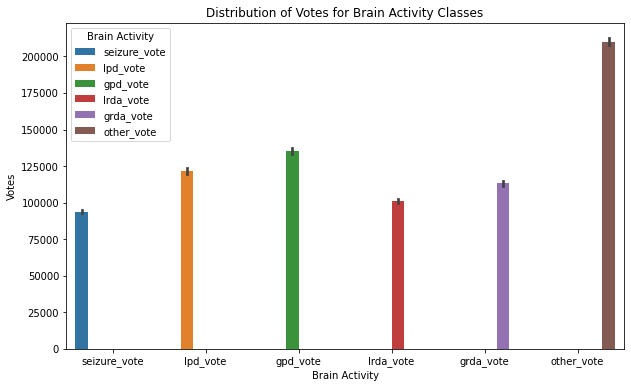

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Brain Activity', y='Votes', hue='Brain Activity', data=df_votes, estimator=sum)
plt.title('Distribution of Votes for Brain Activity Classes')
plt.show()

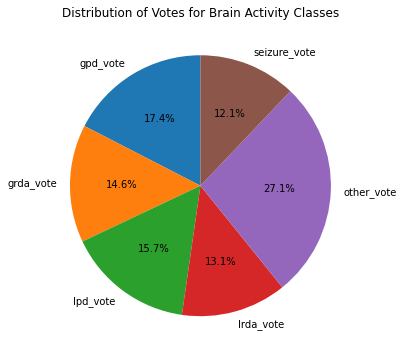

In [31]:
votes_sum = df_votes.groupby('Brain Activity')['Votes'].sum()

plt.figure(figsize=(10, 6))
plt.pie(votes_sum, labels=votes_sum.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Votes for Brain Activity Classes')
plt.show()

In [32]:
df_vote_columns = df[votes_columns]

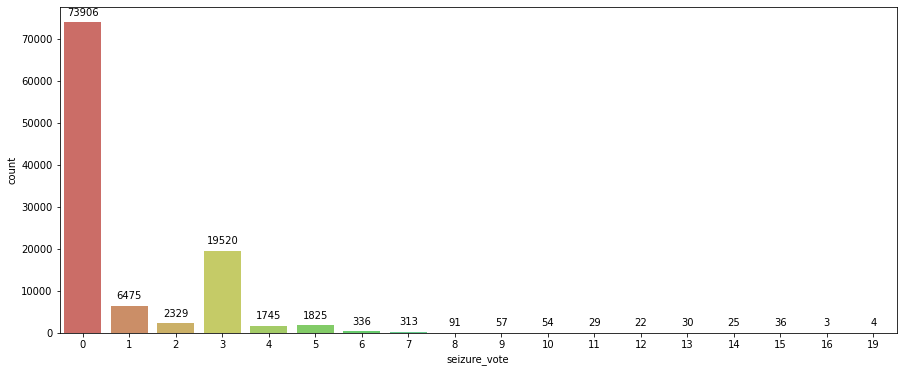

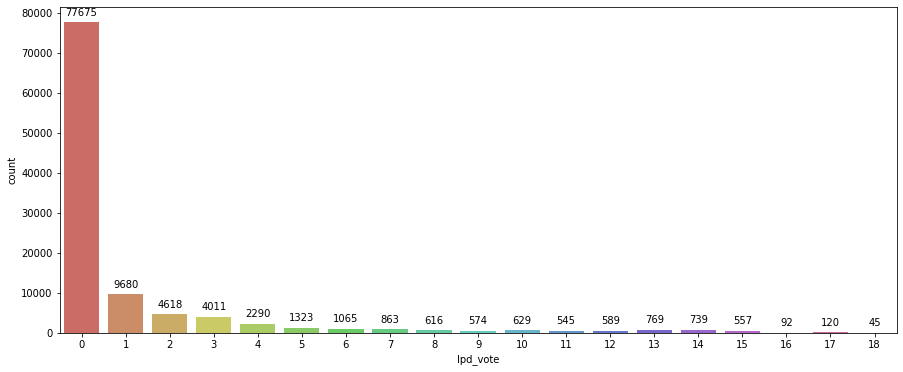

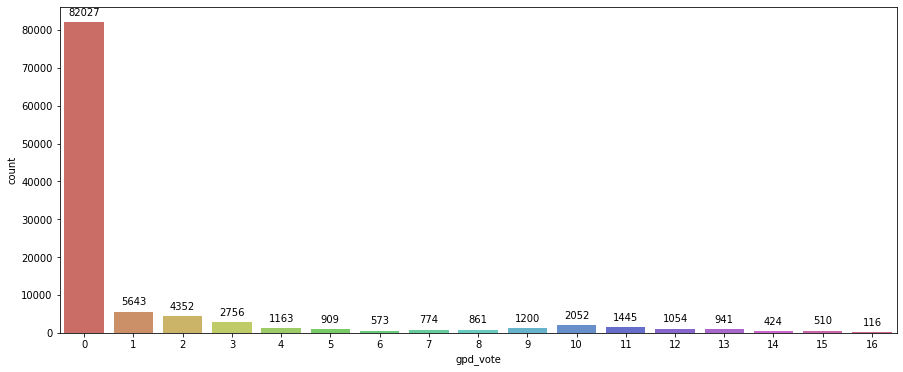

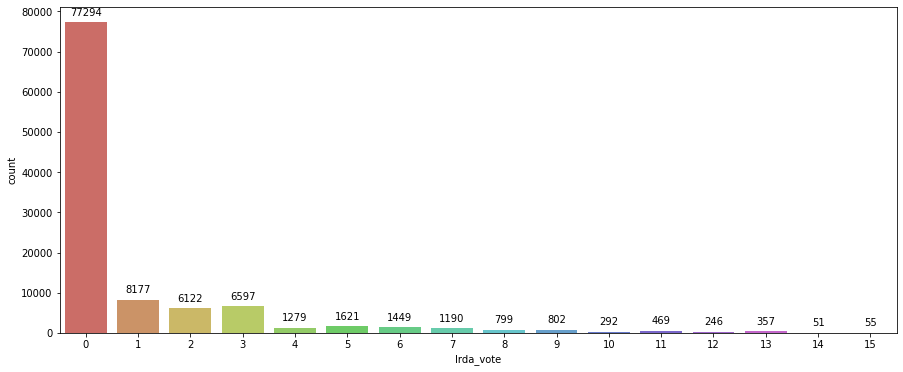

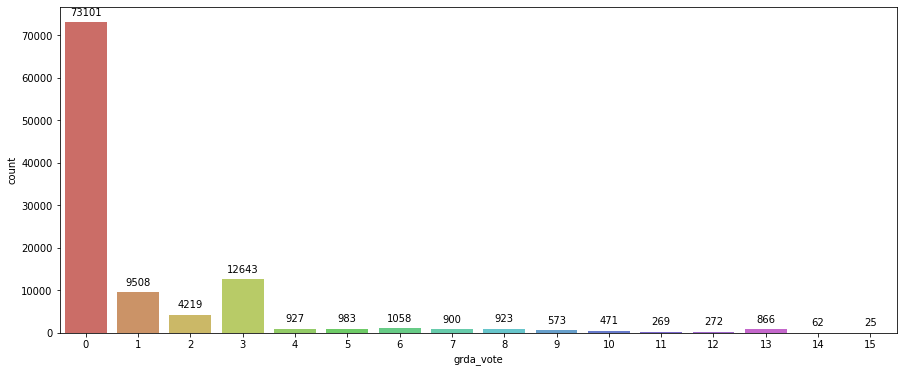

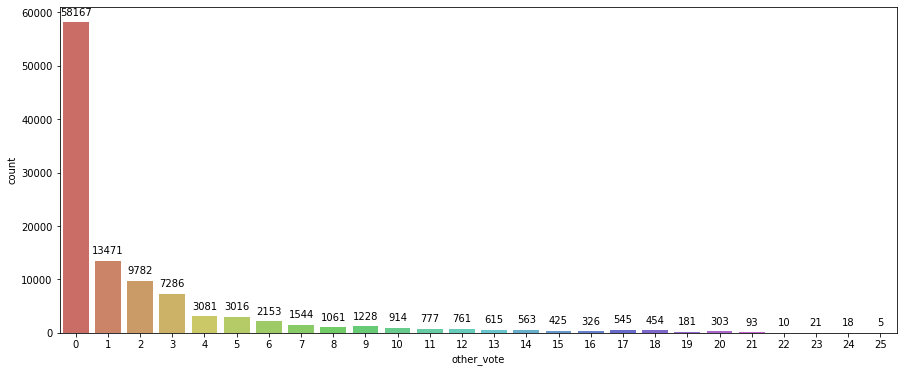

In [33]:
for i in df_vote_columns:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df_vote_columns, palette='hls')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

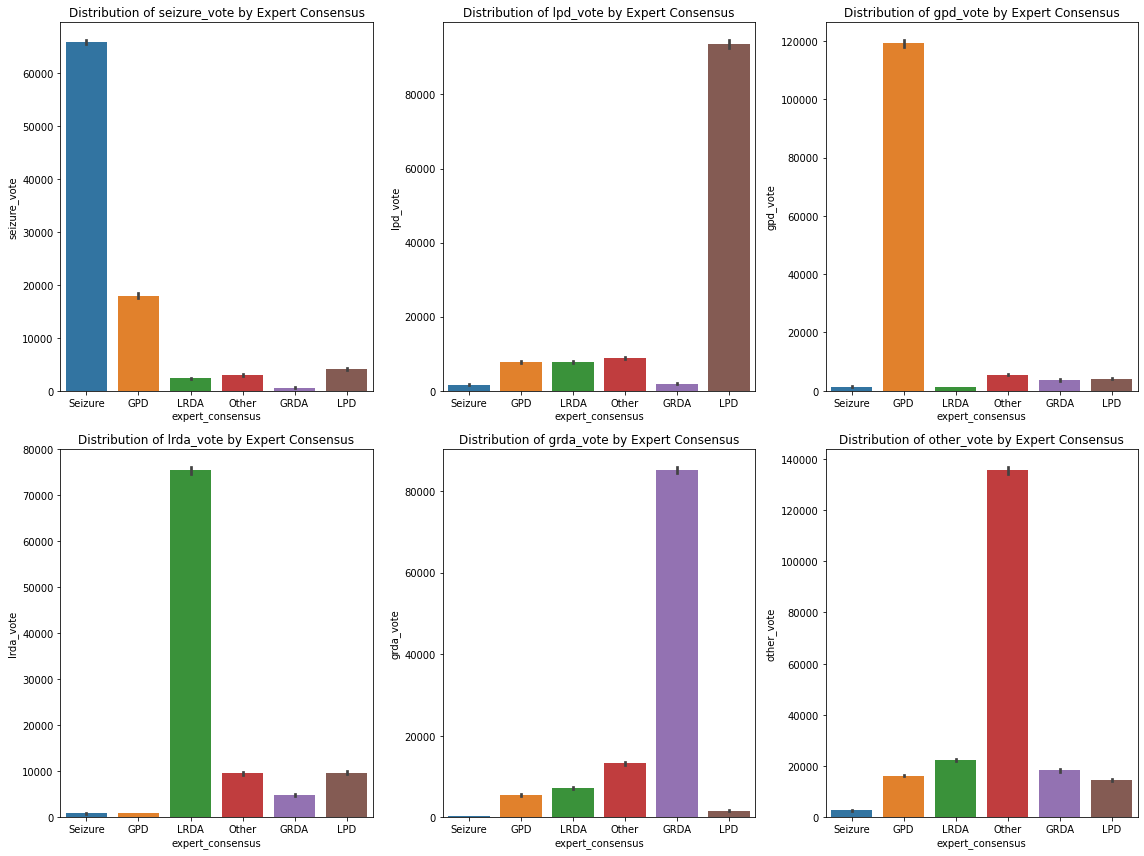

In [34]:
plt.figure(figsize=(16, 12))
votes_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

for i, brain_activity in enumerate(votes_columns, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='expert_consensus', y=brain_activity, data=df, estimator=sum)
    plt.title(f'Distribution of {brain_activity} by Expert Consensus')

plt.tight_layout()
plt.show()

In [35]:
pivot_table_continuous = pd.pivot_table(df, values=continuous, index='expert_consensus', aggfunc='mean', fill_value=0)
pivot_table_continuous

,eeg_id,eeg_label_offset_seconds,eeg_sub_id,gpd_vote,grda_vote,label_id,lpd_vote,lrda_vote,other_vote,patient_id,seizure_vote,spectrogram_id,spectrogram_label_offset_seconds,spectrogram_sub_id
expert_consensus,,,,,,,,,,,,,,
GPD,2.112607e+09,271.789007,60.594001,7.136630,0.327685,2.137788e+09,0.465932,0.056161,0.977967,30894.480362,1.073823,1.012988e+09,681.736199,75.243384
GRDA,2.122264e+09,164.003181,34.889295,0.196119,4.516569,2.139416e+09,0.101161,0.252214,0.974286,31341.035947,0.030751,1.115632e+09,303.706590,44.237951
LPD,2.009430e+09,105.365778,14.422052,0.275714,0.110057,2.135262e+09,6.303177,0.652329,0.982970,33153.806745,0.272079,1.081675e+09,1248.156637,67.645665
LRDA,2.060360e+09,111.167668,41.686238,0.076082,0.437500,2.142999e+09,0.469712,4.535697,1.351863,33981.688041,0.141286,1.046095e+09,516.924760,61.317127
Other,2.148688e+09,25.629307,3.607295,0.291631,0.702573,2.143698e+09,0.471874,0.507337,7.204275,33263.351287,0.155997,1.073661e+09,346.593258,13.892333
Seizure,2.144307e+09,55.406105,7.715951,0.064587,0.015860,2.147165e+09,0.076482,0.041848,0.128649,31499.771652,3.149620,1.067833e+09,229.519753,14.002436


1. **eeg_id:**
   - GPD has an average EEG recording identifier of approximately 2.1126e+09.
   - Other classes have varying average EEG recording identifiers.

   **Interpretation:** The average EEG recording identifier may not provide direct insights into the characteristics of brain activity classes.

2. **eeg_label_offset_seconds:**
   - GPD has an average EEG label offset of approximately 271.79 seconds.
   - Other classes have varying average EEG label offsets.

   **Interpretation:** GPD tends to have EEG signals labeled around 271.79 seconds, suggesting a specific temporal pattern associated with this class.

3. **spectrogram_id:**
   - GPD has an average spectrogram identifier of approximately 1.01299e+09.
   - Other classes have varying average spectrogram identifiers.

   **Interpretation:** The average spectrogram identifier for GPD may indicate a specific pattern or set of characteristics in the spectrogram associated with this class.

4. **seizure_vote:**
   - Seizure has the highest average vote count, indicating a higher level of agreement among annotators for this class.
   - Other classes have lower average vote counts.

   **Interpretation:** Seizure tends to have a higher level of agreement among annotators, suggesting that it might be a more easily identifiable brain activity class compared to others.

These interpretations provide a high-level understanding of the average characteristics associated with different brain activity classes based on the provided features. It's important to note that further in-depth analysis and domain expertise may be required to draw more specific conclusions about the significance of these averages in the context of EEG signal processing and brain activity classification. 

In [36]:
df['Brain Activity'] = df[votes_columns].idxmax(axis=1).apply(lambda x: x.replace('_vote', ''))

In [37]:
df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,Brain Activity
0,1628180742,0,0,353733,0,0,127492639,42516,Seizure,3,0,0,0,0,0,seizure
1,1628180742,1,6,353733,1,6,3887563113,42516,Seizure,3,0,0,0,0,0,seizure
2,1628180742,2,8,353733,2,8,1142670488,42516,Seizure,3,0,0,0,0,0,seizure
3,1628180742,3,18,353733,3,18,2718991173,42516,Seizure,3,0,0,0,0,0,seizure
4,1628180742,4,24,353733,4,24,3080632009,42516,Seizure,3,0,0,0,0,0,seizure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12,2147388374,6,12,4195677307,10351,LRDA,0,0,0,3,0,0,lrda
106796,351917269,7,14,2147388374,7,14,290896675,10351,LRDA,0,0,0,3,0,0,lrda
106797,351917269,8,16,2147388374,8,16,461435451,10351,LRDA,0,0,0,3,0,0,lrda
106798,351917269,9,18,2147388374,9,18,3786213131,10351,LRDA,0,0,0,3,0,0,lrda


In [38]:
grouped_continuous = df.groupby('eeg_id')[continuous].mean().reset_index(drop=True)
grouped_continuous

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,5.686570e+05,1.5,8.500000,7.895773e+08,1.5,8.500000,2.176284e+09,20654.0,0.0,0.0,3.0,0.0,2.0,7.0
1,5.829990e+05,5.0,17.454545,1.552638e+09,5.0,17.454545,1.677750e+09,20230.0,0.0,12.0,0.0,1.0,0.0,1.0
2,6.423820e+05,0.5,12.000000,1.496020e+07,12.5,1020.000000,2.903413e+09,5955.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7.517900e+05,0.0,0.000000,6.187284e+08,4.0,908.000000,2.898467e+09,38549.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7.787050e+05,0.0,0.000000,5.229632e+07,0.0,0.000000,3.255875e+09,40955.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084,4.293354e+09,0.0,0.000000,1.188114e+09,0.0,0.000000,4.472442e+08,16610.0,0.0,0.0,0.0,0.0,1.0,1.0
17085,4.293843e+09,0.0,0.000000,1.549503e+09,0.0,0.000000,1.618953e+09,15065.0,0.0,0.0,0.0,0.0,1.0,1.0
17086,4.294455e+09,0.0,0.000000,2.105480e+09,0.0,0.000000,4.695264e+08,56.0,0.0,0.0,0.0,0.0,0.0,1.0
17087,4.294859e+09,2.0,5.600000,6.572992e+08,2.0,5.600000,2.652198e+09,4312.0,0.0,0.0,0.0,0.0,1.0,14.0


In [39]:
targets = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

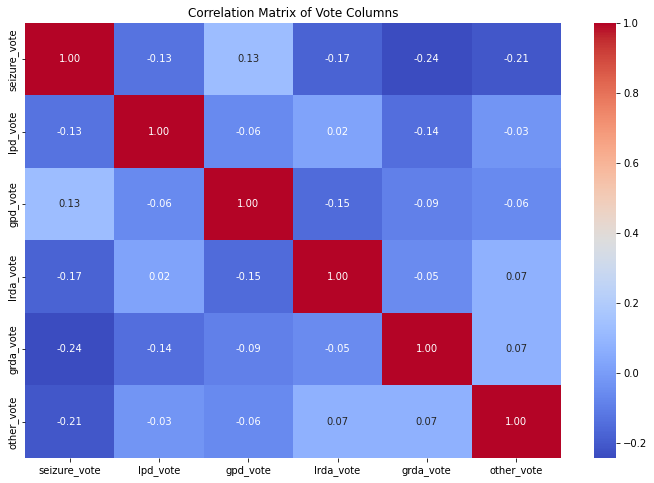

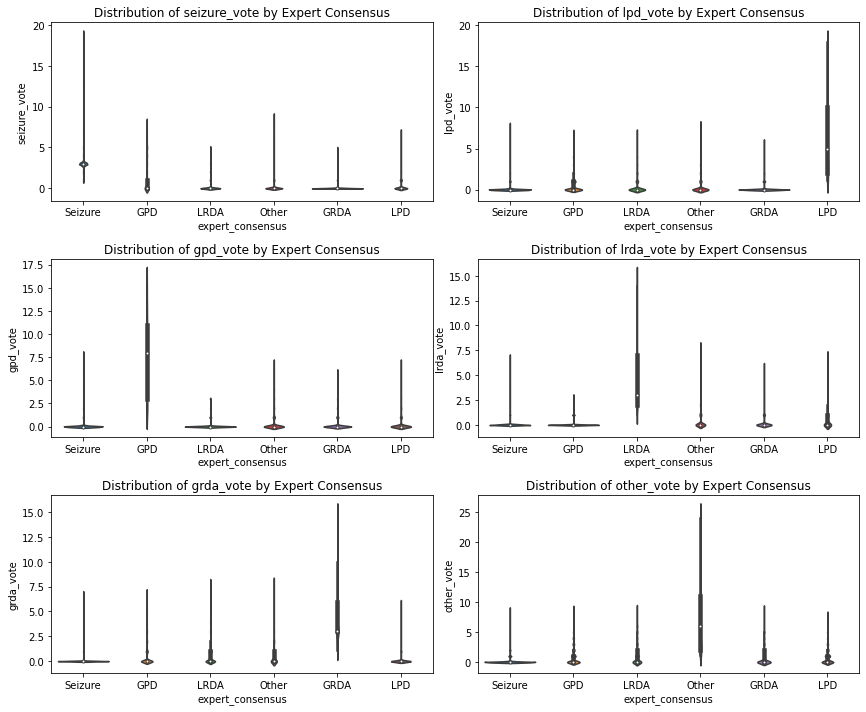

In [40]:
correlation_targets = df[targets].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_targets, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Vote Columns')
plt.show()

plt.figure(figsize=(12, 10))
for i, column in enumerate(targets, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(data=df, x='expert_consensus', y=column)
    plt.title(f'Distribution of {column} by Expert Consensus')

plt.tight_layout()
plt.show()

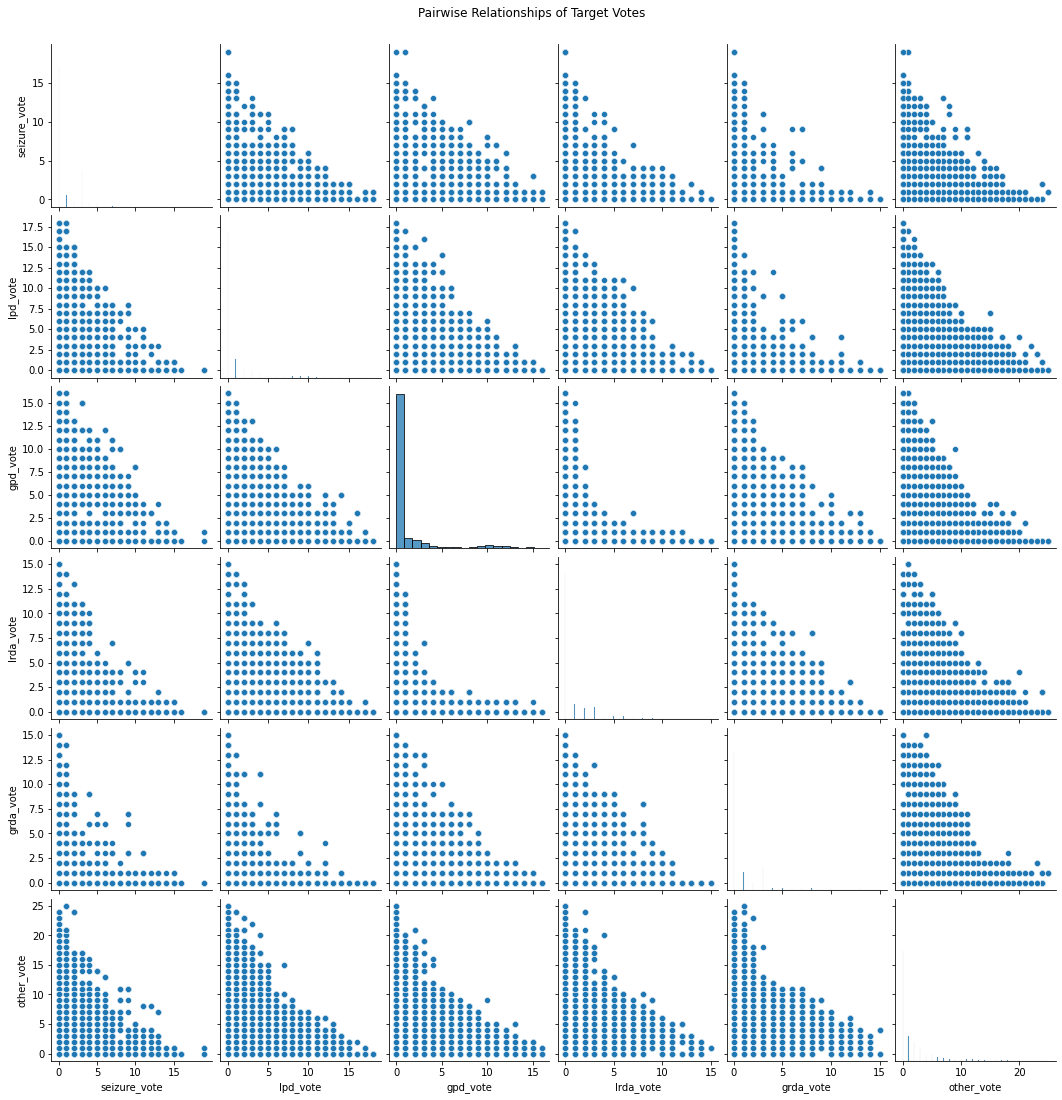

In [41]:
sns.pairplot(df[targets])
plt.suptitle('Pairwise Relationships of Target Votes', y=1.02)
plt.show()

<Figure size 1440x576 with 0 Axes>

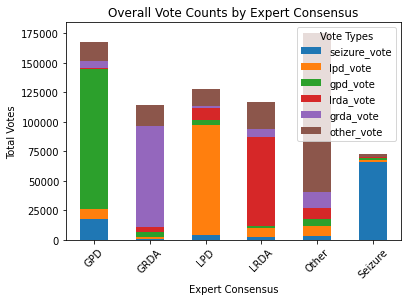

In [43]:
vote_counts_by_consensus = df.groupby('expert_consensus')[targets].sum()

plt.figure(figsize=(20, 8))
vote_counts_by_consensus.plot(kind='bar', stacked=True)
plt.title('Overall Vote Counts by Expert Consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.legend(title='Vote Types')
plt.show()

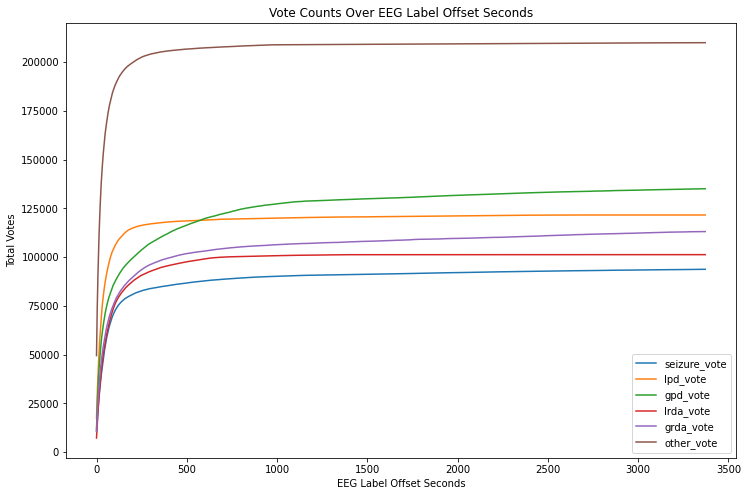

In [44]:
cumulative_votes = df.groupby('eeg_label_offset_seconds')[targets].sum().cumsum().reset_index()

plt.figure(figsize=(12, 8))
for column in targets:
    plt.plot(cumulative_votes['eeg_label_offset_seconds'], cumulative_votes[column], label=column)

plt.title('Vote Counts Over EEG Label Offset Seconds')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Total Votes')
plt.legend()
plt.show()

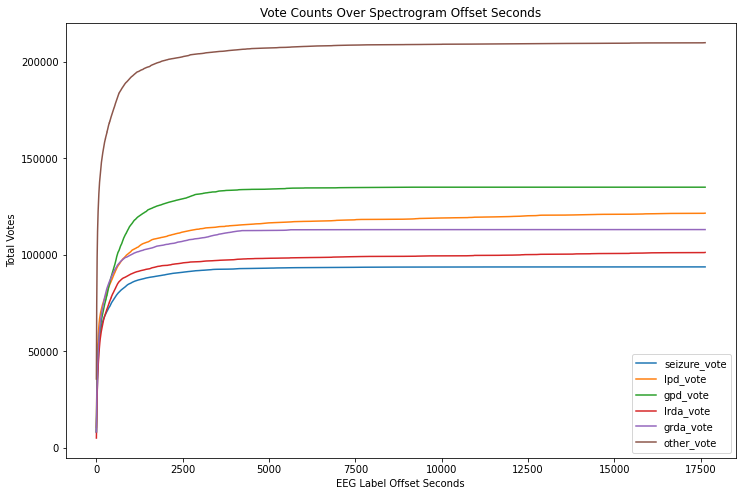

In [45]:
cumulative_votes =df.groupby('spectrogram_label_offset_seconds')[targets].sum().cumsum().reset_index()

plt.figure(figsize=(12, 8))
for column in targets:
    plt.plot(cumulative_votes['spectrogram_label_offset_seconds'], cumulative_votes[column], label=column)

plt.title('Vote Counts Over Spectrogram Offset Seconds')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Total Votes')
plt.legend()
plt.show()

In [46]:
cumulative_votes

,spectrogram_label_offset_seconds,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,0,8009,10734,8311,5061,8281,35651
1,2,10077,14828,12654,7650,11533,45847
2,4,12273,18861,16759,10248,14689,55170
3,6,14422,22099,20451,12586,17656,62513
4,8,16367,25458,23468,14960,20268,68793
...,...,...,...,...,...,...,...
4681,17622,93773,121606,135094,101250,113121,209983
4682,17624,93773,121610,135094,101257,113121,209987
4683,17626,93773,121614,135094,101264,113121,209991
4684,17630,93773,121618,135094,101271,113121,209995


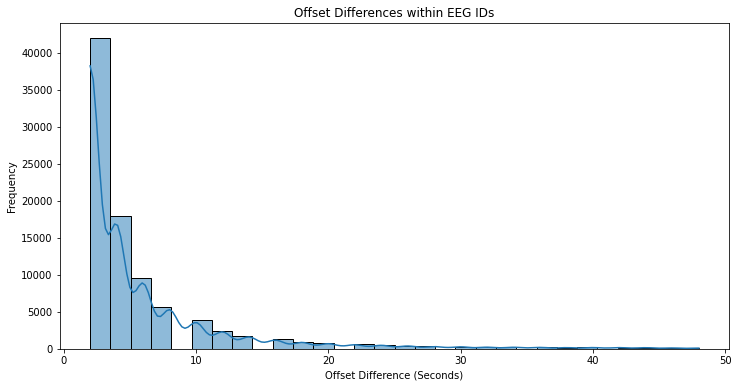

In [47]:
sorted_data = df.sort_values(by=['eeg_id', 'eeg_sub_id'])

sorted_data['offset_difference'] = sorted_data.groupby('eeg_id')['eeg_label_offset_seconds'].diff()

offset_differences = sorted_data['offset_difference'].dropna()

offset_difference_stats = offset_differences.describe()

plt.figure(figsize=(12, 6))
sns.histplot(offset_differences, bins=30, kde=True)
plt.title('Offset Differences within EEG IDs')
plt.xlabel('Offset Difference (Seconds)')
plt.ylabel('Frequency')
plt.show()

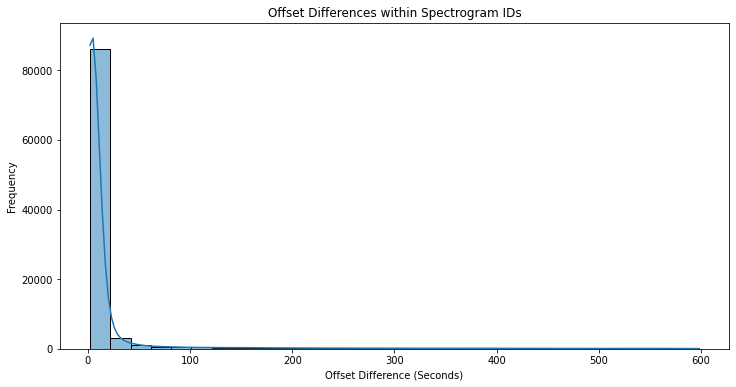

In [48]:
sorted_data = df.sort_values(by=['spectrogram_id', 'spectrogram_sub_id'])

sorted_data['offset_difference'] = sorted_data.groupby('spectrogram_id')['spectrogram_label_offset_seconds'].diff()

offset_differences = sorted_data['offset_difference'].dropna()

offset_difference_stats = offset_differences.describe()

plt.figure(figsize=(12, 6))
sns.histplot(offset_differences, bins=30, kde=True)
plt.title('Offset Differences within Spectrogram IDs')
plt.xlabel('Offset Difference (Seconds)')
plt.ylabel('Frequency')
plt.show()

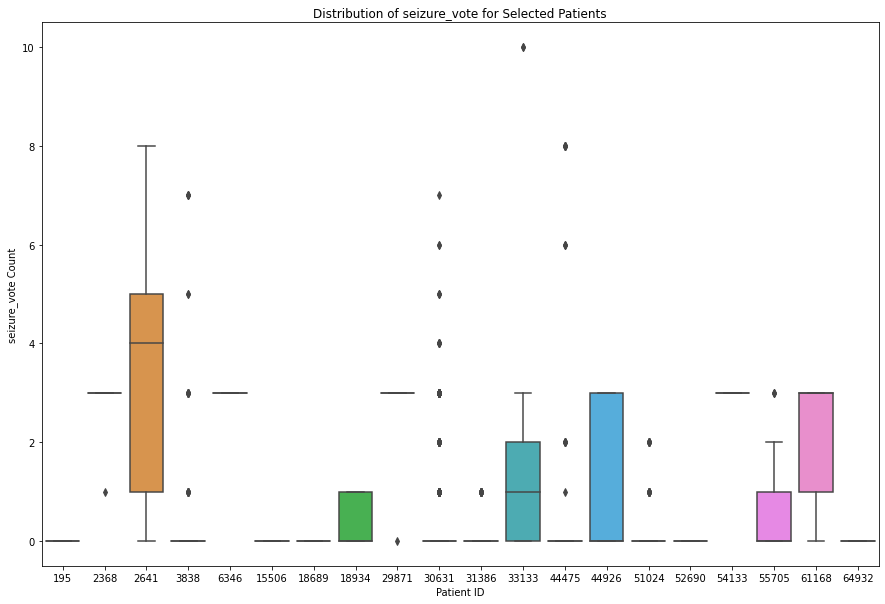

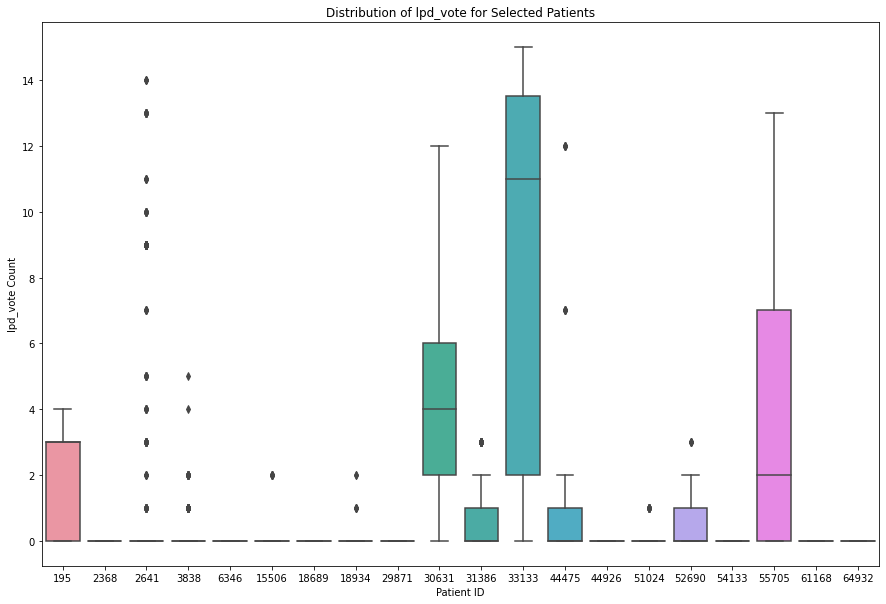

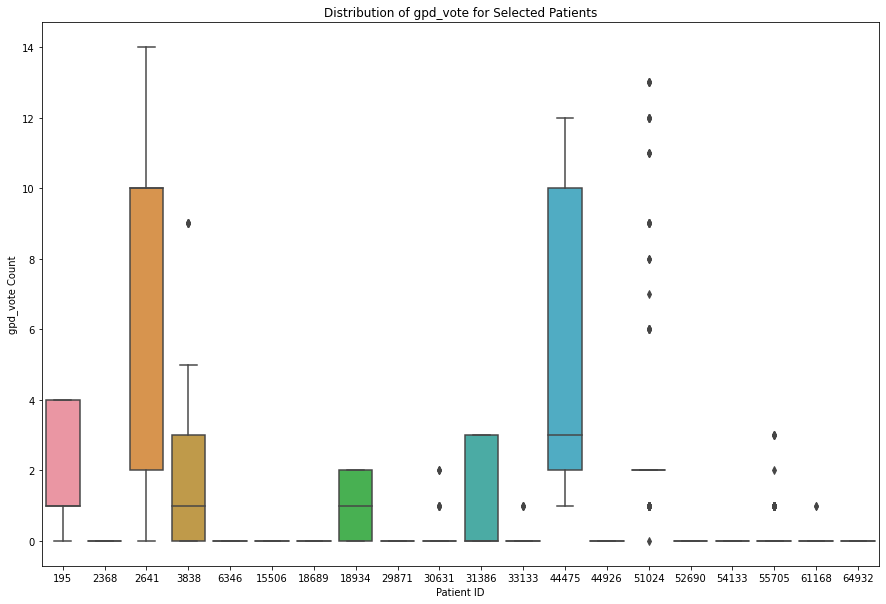

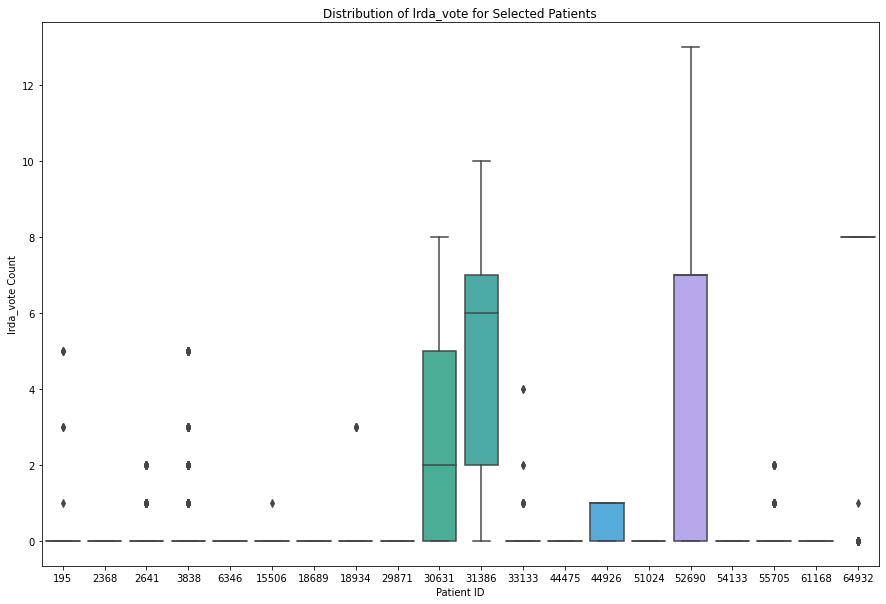

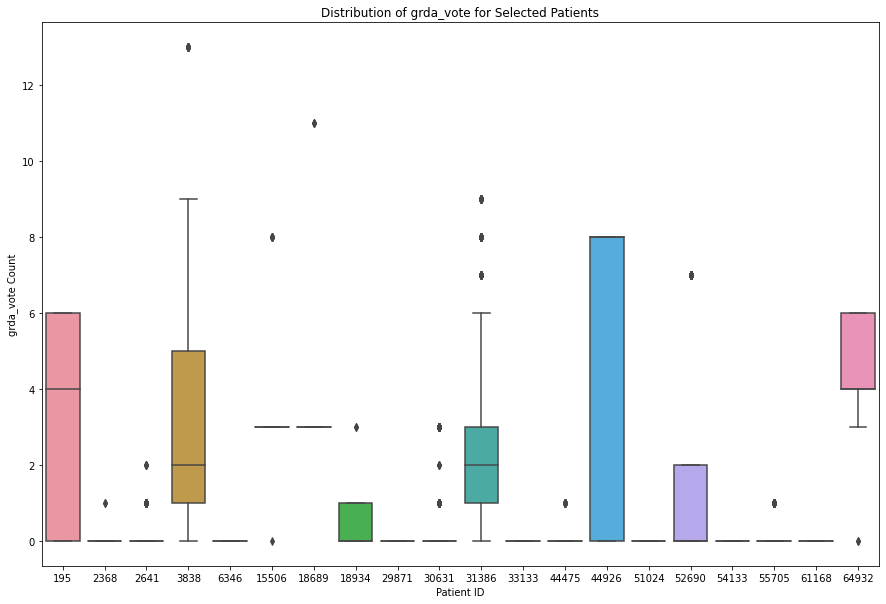

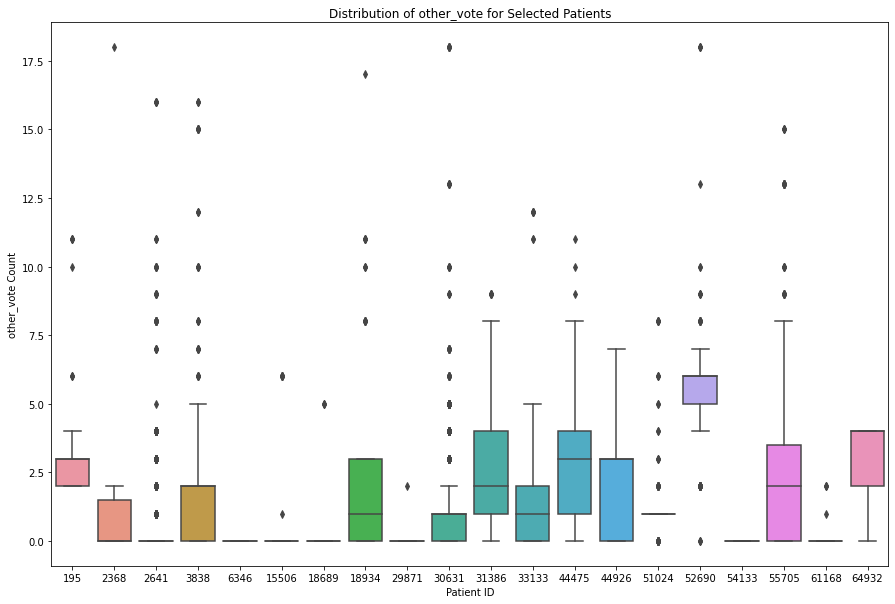

In [49]:
sample_patients = df['patient_id'].sample(20, random_state=1).values
sample_data = df[df['patient_id'].isin(sample_patients)]

for i, vote_type in enumerate(targets, 1):
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='patient_id', y=vote_type, data=sample_data)
    plt.title(f'Distribution of {vote_type} for Selected Patients')
    plt.xlabel('Patient ID')
    plt.ylabel(f'{vote_type} Count')
    plt.show()

<Figure size 1080x720 with 0 Axes>

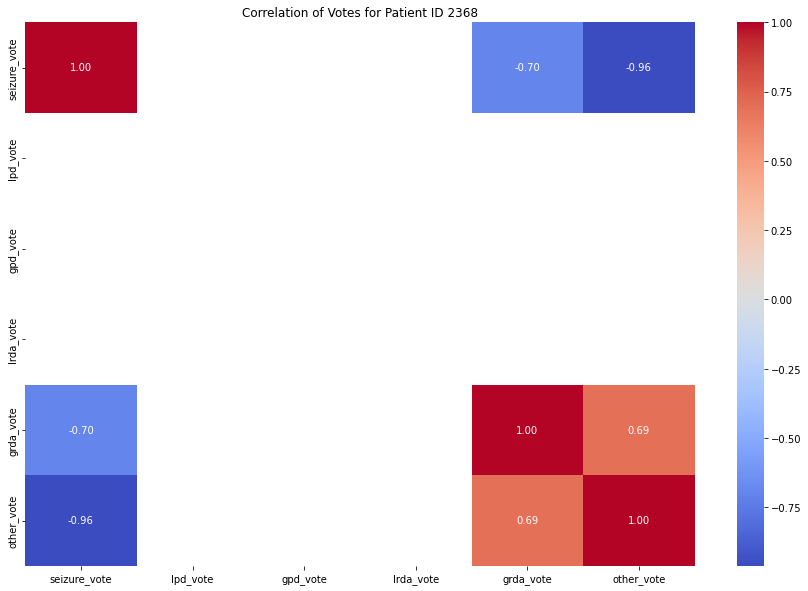

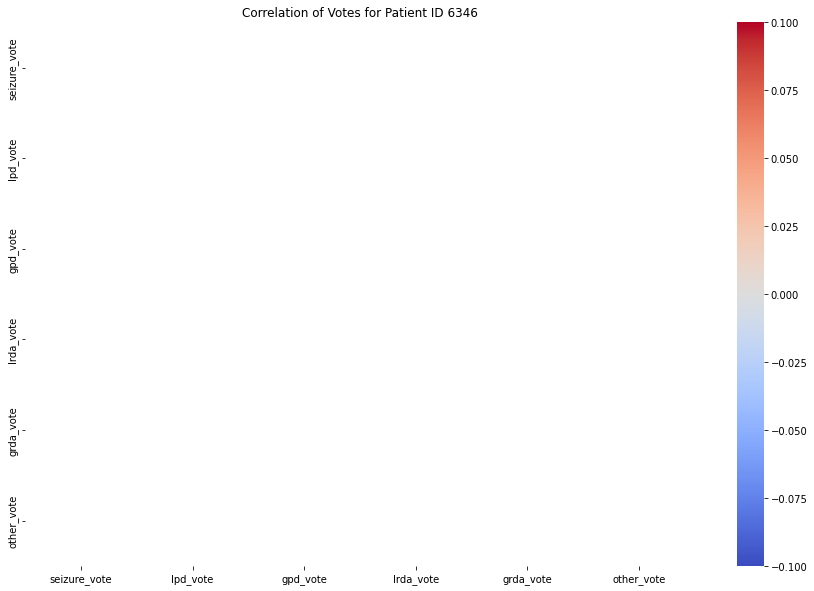

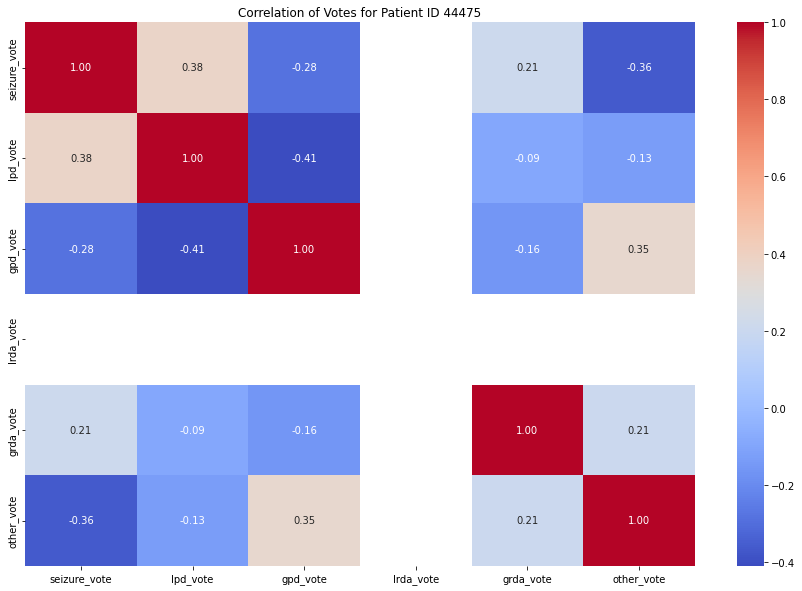

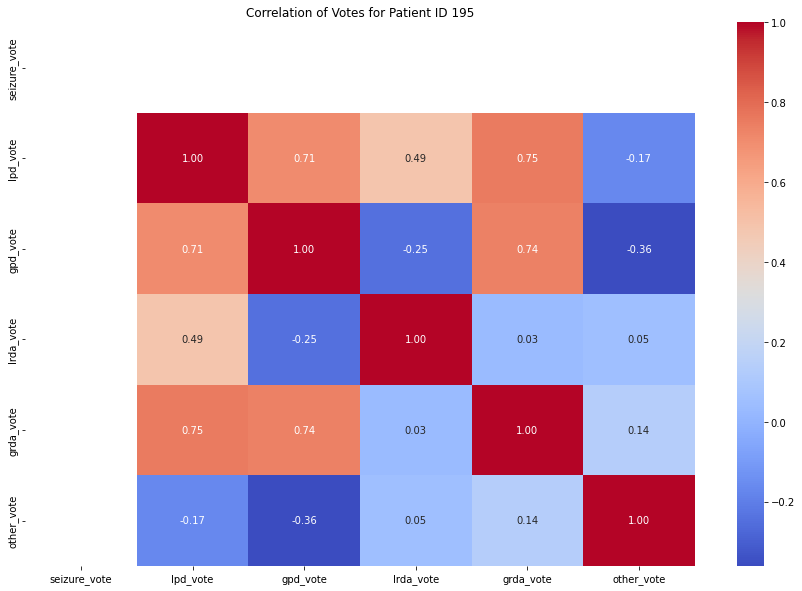

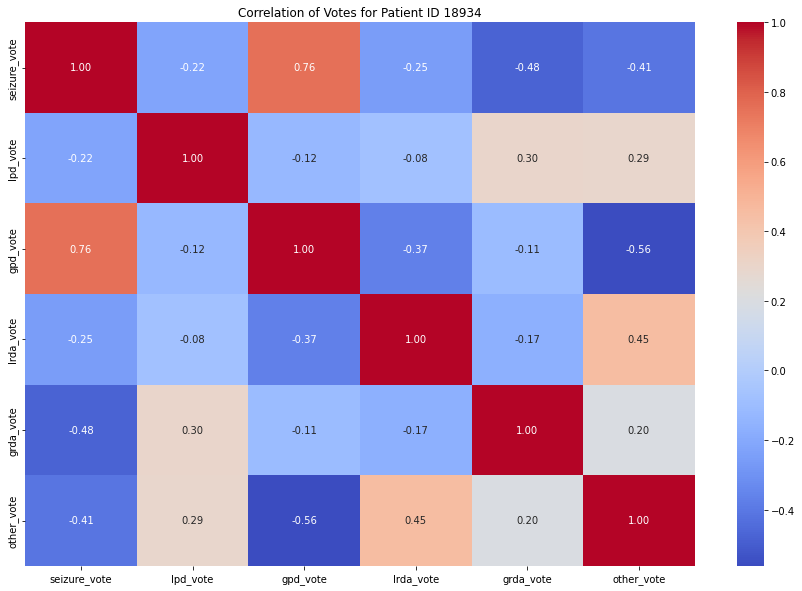

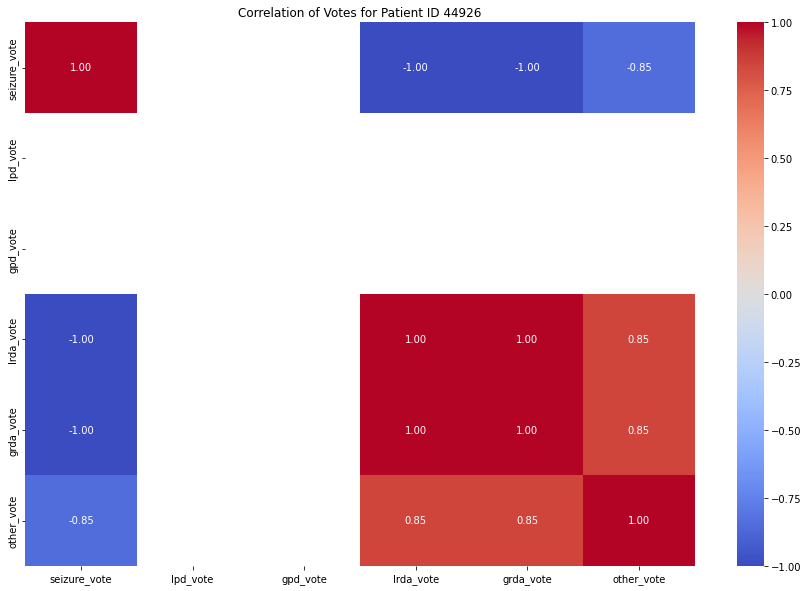

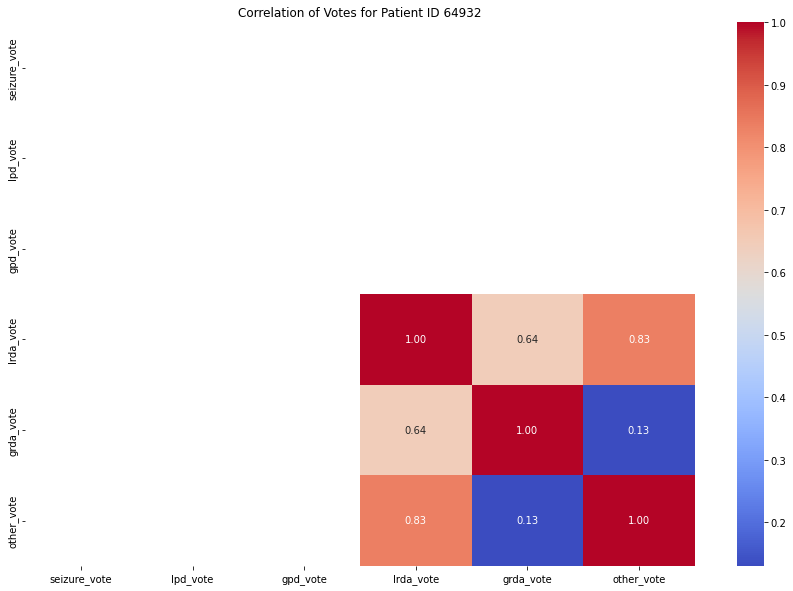

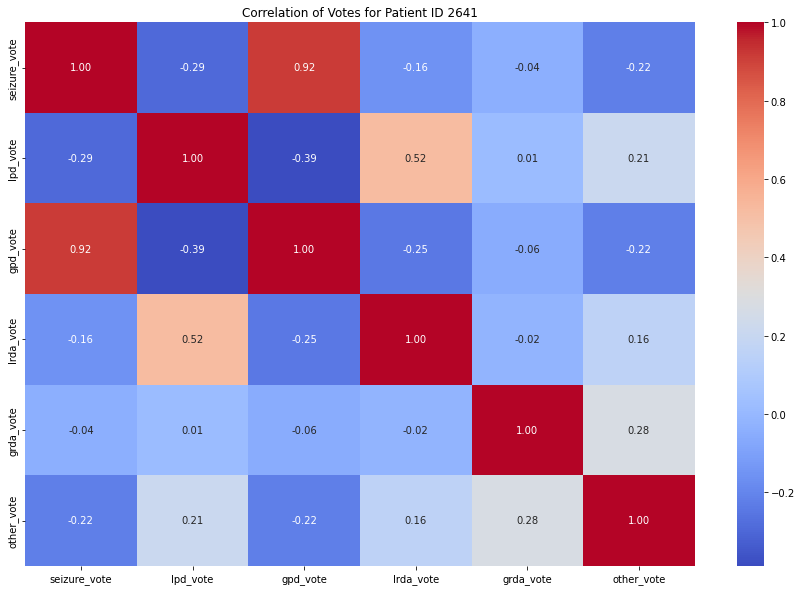

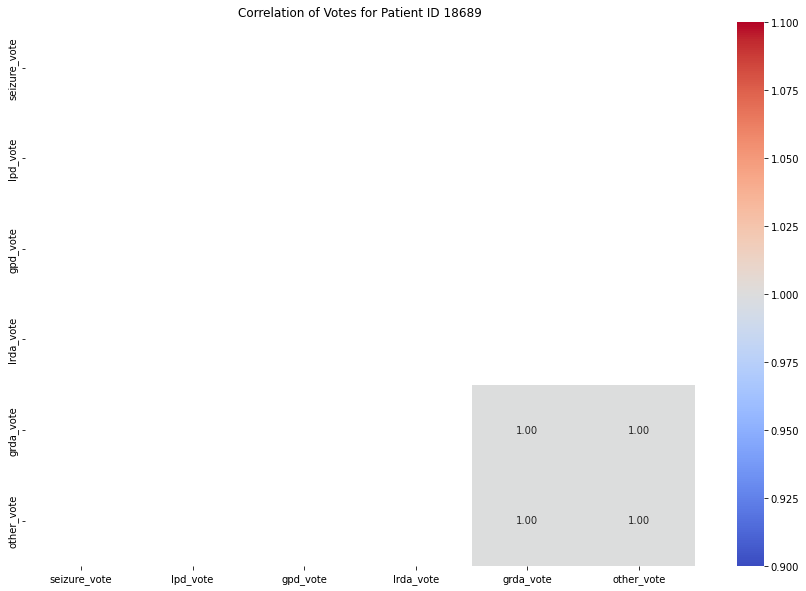

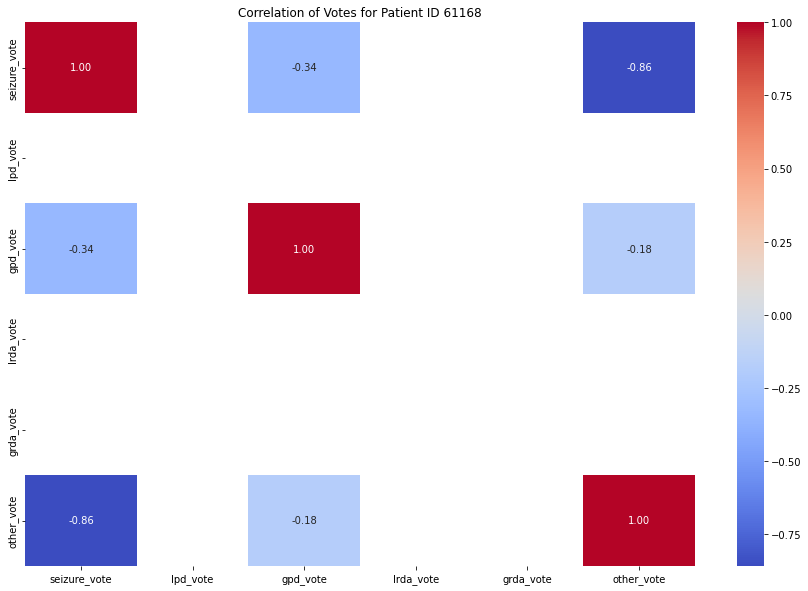

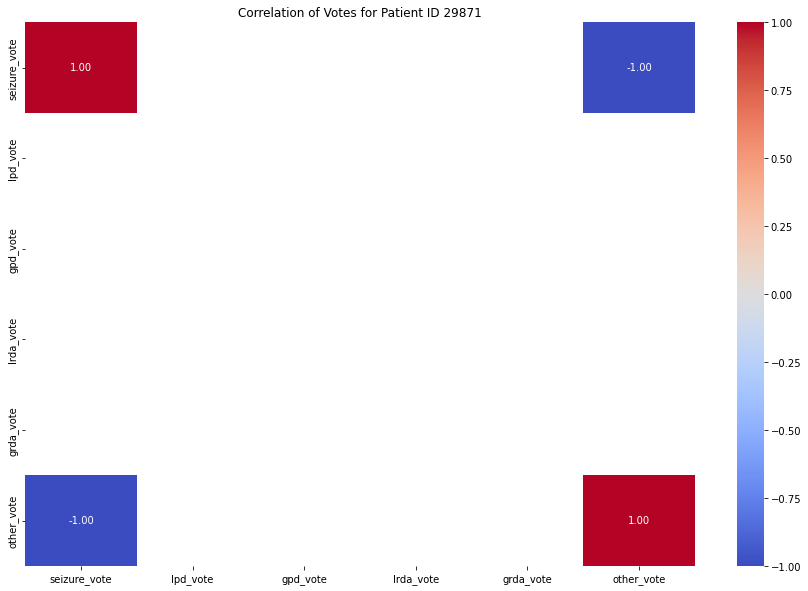

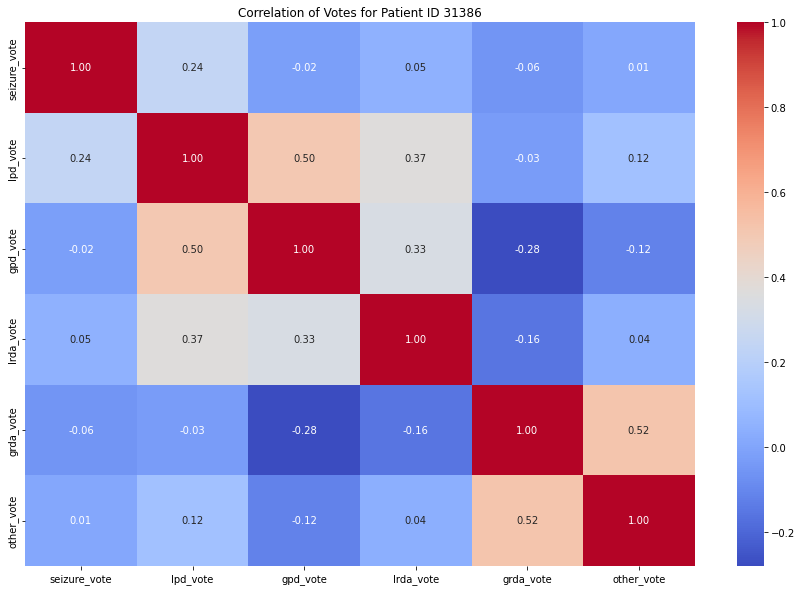

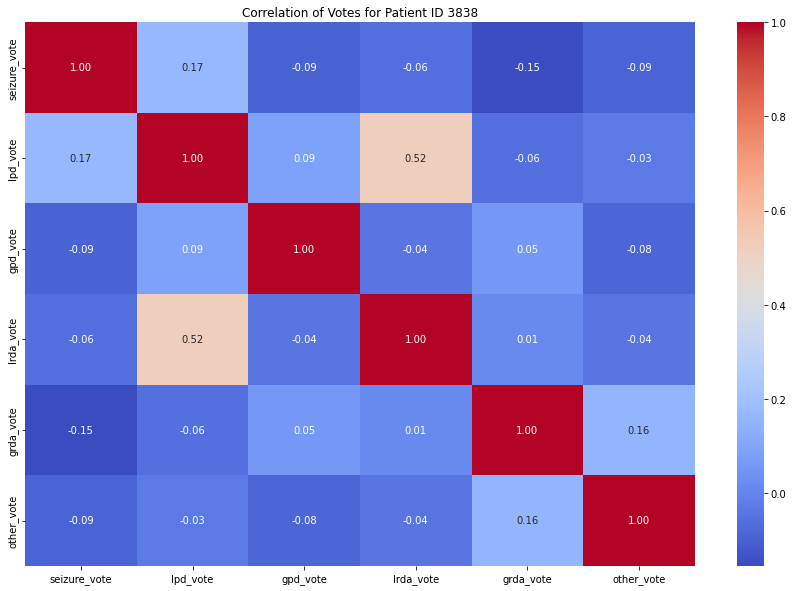

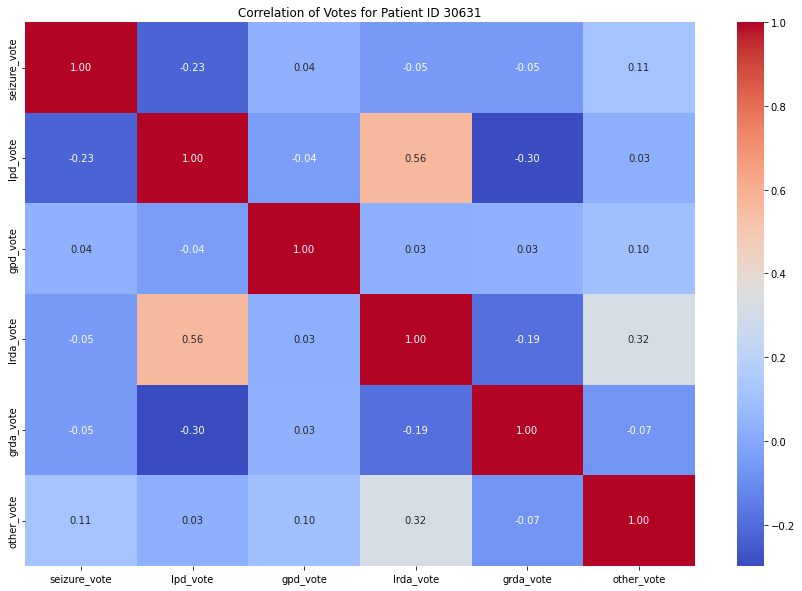

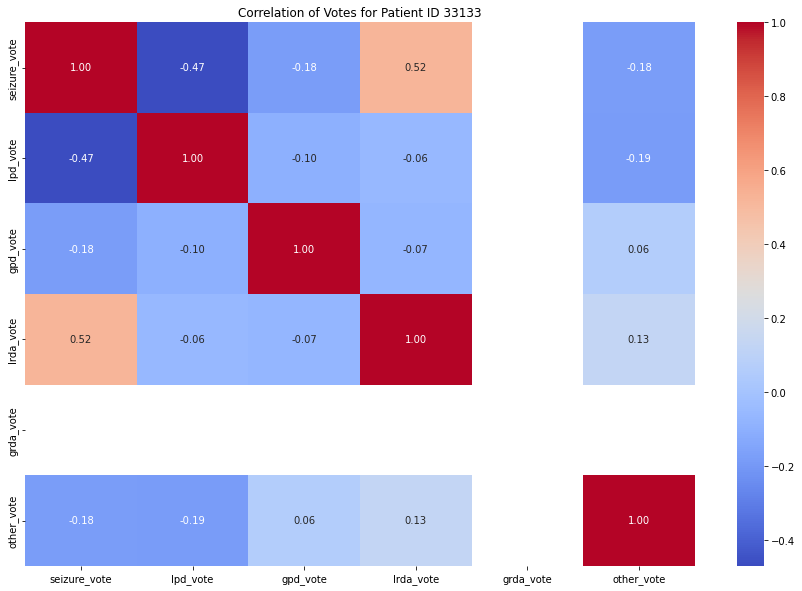

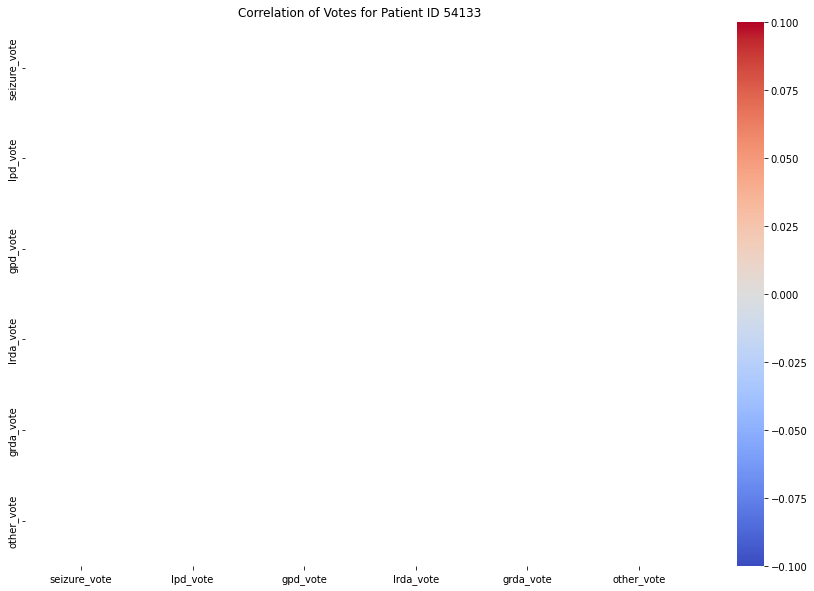

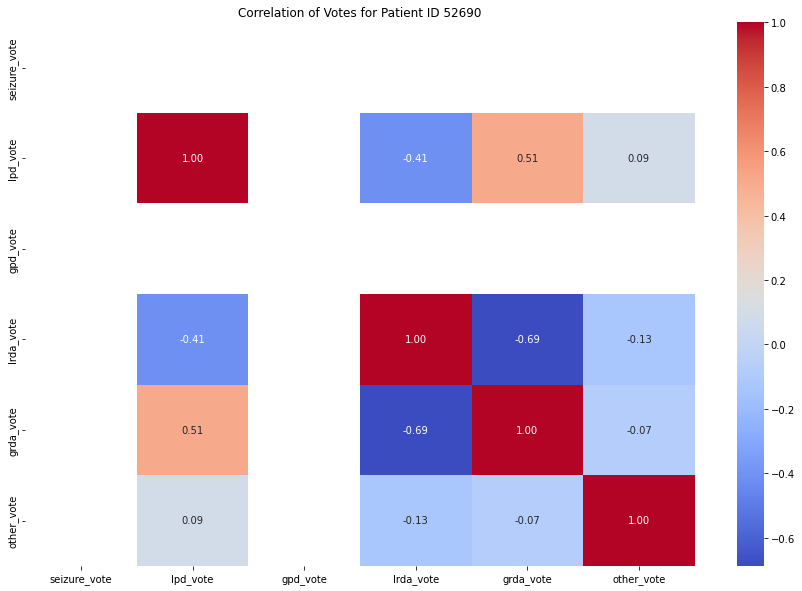

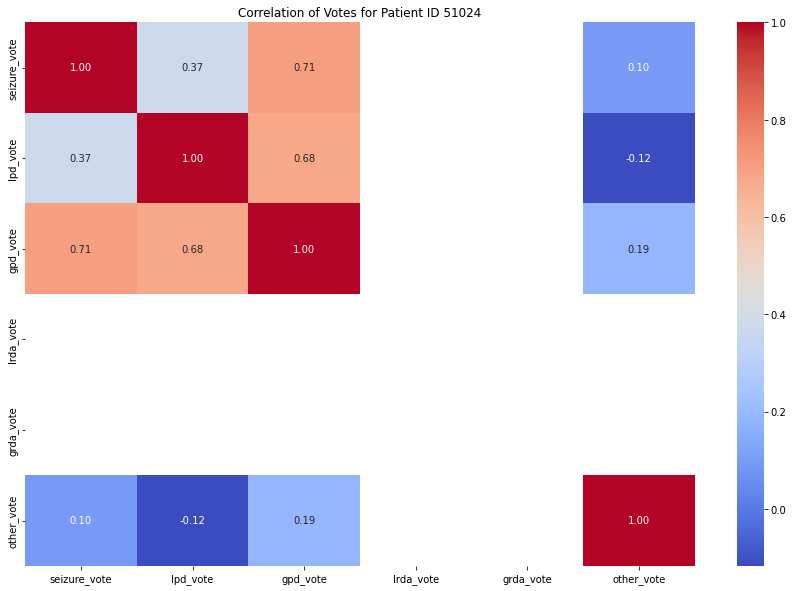

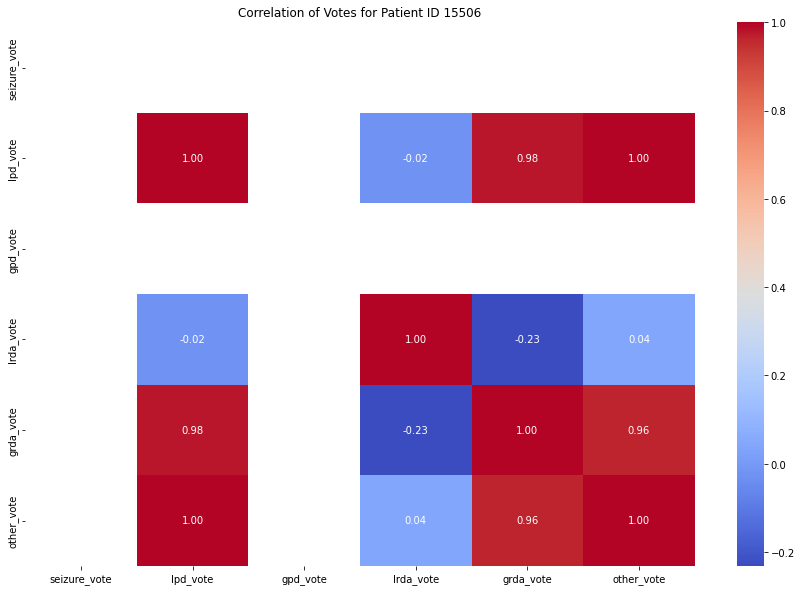

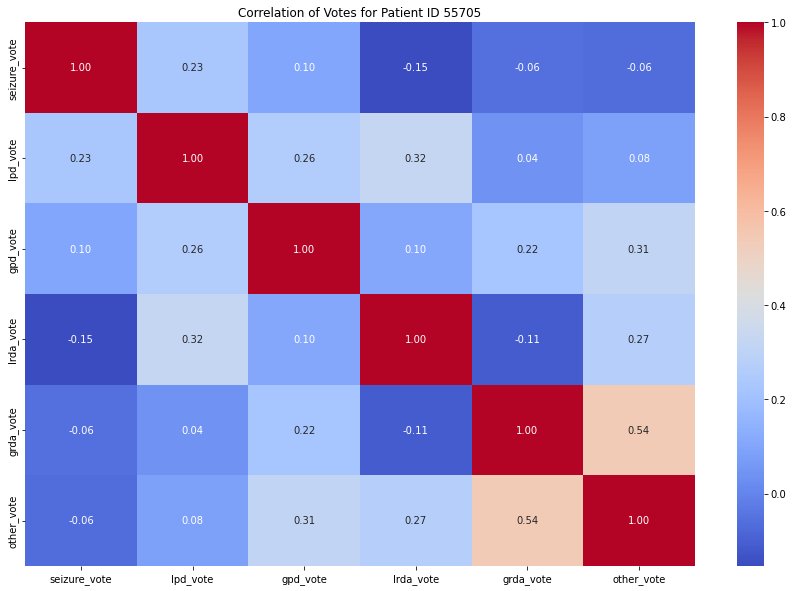

In [51]:
plt.figure(figsize=(15, 10))


for i, patient_id in enumerate(sample_patients, 1):
    plt.figure(figsize=(15, 10))
    patient_data = df[df['patient_id'] == patient_id]
    correlation_matrix = patient_data[targets].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation of Votes for Patient ID {patient_id}')
    plt.show()

In [52]:
total_votes_per_pat = df.groupby('patient_id')[targets].sum().sum(axis=1)
normalized_votes = df.groupby('patient_id')[targets].sum().div(total_votes_per_pat, axis=0)
mean_vote_ratio = normalized_votes.mean()
print( mean_vote_ratio )

seizure_vote    0.310718
lpd_vote        0.046279
gpd_vote        0.051885
lrda_vote       0.081796
grda_vote       0.231471
other_vote      0.277851
dtype: float64


In [53]:
target_eeg_id = 1000913311
df_filtered = df[df['eeg_id'] == target_eeg_id]
df_filtered

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,Brain Activity
9529,1000913311,0,0,175871552,0,0,3905268514,59743,Other,0,0,0,0,0,2,other


In [54]:
df_filtered = pd.read_parquet('1000913311.parquet')

In [55]:
df_filtered

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-105.849998,-89.230003,-79.459999,-49.230000,-99.730003,-87.769997,-53.330002,-50.740002,-32.250000,-42.099998,-43.270000,-88.730003,-74.410004,-92.459999,-58.930000,-75.739998,-59.470001,8.210000,66.489998,1404.930054
1,-85.470001,-75.070000,-60.259998,-38.919998,-73.080002,-87.510002,-39.680000,-35.630001,-76.839996,-62.740002,-43.040001,-68.629997,-61.689999,-69.320000,-35.790001,-58.900002,-41.660000,196.190002,230.669998,3402.669922
2,8.840000,34.849998,56.430000,67.970001,48.099998,25.350000,80.250000,48.060001,6.720000,37.880001,61.000000,16.580000,55.060001,45.020000,70.529999,47.820000,72.029999,-67.180000,-171.309998,-3565.800049
3,-56.320000,-37.279999,-28.100000,-2.820000,-43.430000,-35.049999,3.910000,-12.660000,8.650000,3.830000,4.180000,-51.900002,-21.889999,-41.330002,-11.580000,-27.040001,-11.730000,-91.000000,-81.190002,-1280.930054
4,-110.139999,-104.519997,-96.879997,-70.250000,-111.660004,-114.430000,-71.830002,-61.919998,-76.150002,-79.779999,-67.480003,-99.029999,-93.610001,-104.410004,-70.070000,-89.250000,-77.260002,155.729996,264.850006,4325.370117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-45.540001,-26.459999,-23.209999,-25.250000,-21.559999,-36.549999,10.730000,-16.290001,-55.919998,-28.670000,-29.770000,-22.000000,3.710000,8.470000,0.480000,9.950000,33.959999,110.510002,58.599998,301.239990
9996,-26.860001,4.350000,7.410000,7.830000,5.260000,7.750000,50.130001,4.150000,1.720000,22.100000,7.150000,-6.820000,38.070000,32.880001,21.990000,32.990002,60.209999,-156.949997,-275.929993,-4634.799805
9997,-133.759995,-111.190002,-119.180000,-105.760002,-130.039993,-104.059998,-68.290001,-86.480003,-57.130001,-68.830002,-95.839996,-107.540001,-86.449997,-94.099998,-97.050003,-86.339996,-68.040001,-14.880000,66.440002,1667.800049
9998,-78.889999,-59.660000,-60.770000,-59.810001,-63.020000,-60.020000,-20.690001,-42.820000,-68.669998,-54.740002,-62.810001,-52.869999,-34.099998,-31.500000,-37.810001,-32.259998,-10.870000,137.559998,193.839996,2743.379883


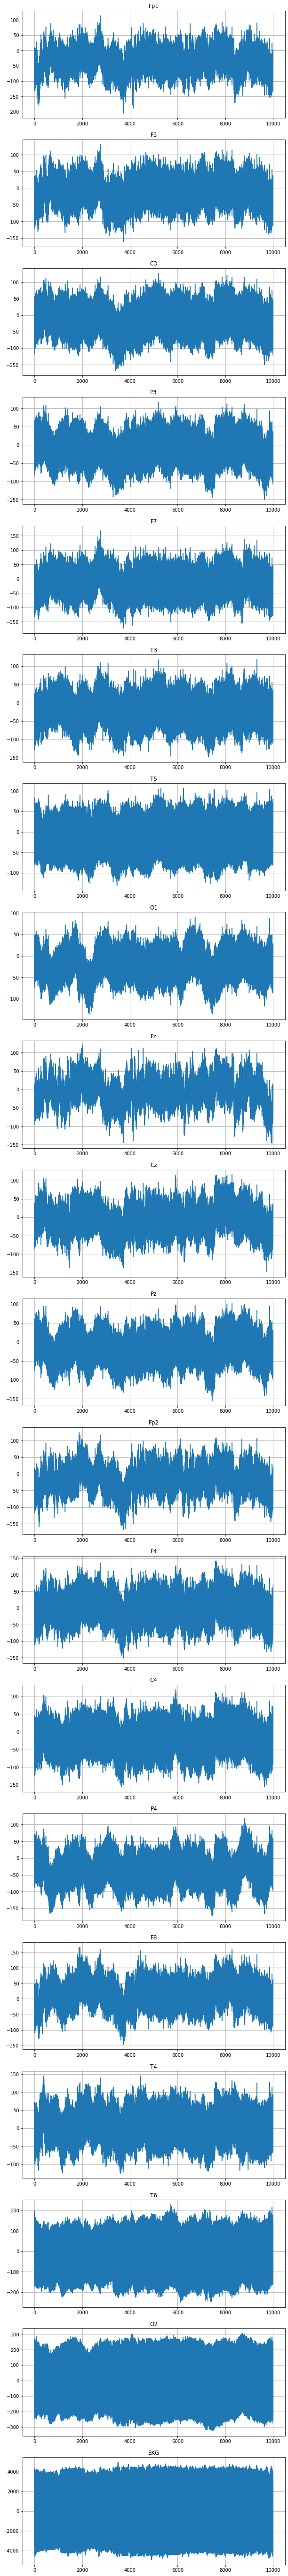

In [56]:
fig, ax = plt.subplots(20, figsize=(10, 100))

for i, column in enumerate(df_filtered.columns):
    ax[i].plot(df_filtered.index, df_filtered[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))
    
plt.show()

Data has a lot of peaks and troughs, indicating a high variation
The scale of most of the plots ranging from -200 to 100, excluding EKG chart
The line seems to fluctuate above and below a central value, which seems to be around zero value